In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import re



In [14]:
import os
import re

def check_accident_files(folder_name):
    # Define expected suffixes (case-insensitive)
    expected_suffixes = ['AccData.csv', 'InvData.csv', 'VehData.csv']

    try:
        files_in_folder = os.listdir(folder_name)
    except FileNotFoundError:
        print(f"Folder '{folder_name}' not found.")
        return 0

    # Compile regex pattern with case-insensitive flag
    pattern = re.compile(r'H\d{4}\d{4}(AccData|InvData|VehData)\.csv', re.IGNORECASE)

    # Filter matching files
    matching_files = [f for f in files_in_folder if pattern.fullmatch(f)]

    if len(matching_files) == 6:
        print("OK")
        return 1
    else:
        print(f"Expected 6 files, found {len(matching_files)}.")
        return 0


In [15]:
check_accident_files('IL2021')

OK


In [26]:
import os
import re
import pandas as pd

def check_accident_files(folder_name):
    # Define expected suffixes (case-insensitive)
    expected_suffixes = ['AccData.csv', 'InvData.csv', 'VehData.csv']

    try:
        files_in_folder = os.listdir(folder_name)
    except FileNotFoundError:
        return 0

    # Compile regex pattern with case-insensitive flag
    pattern = re.compile(r'H\d{4}\d{4}(AccData|InvData|VehData)\.csv', re.IGNORECASE)

    # Filter matching files
    matching_files = [f for f in files_in_folder if pattern.fullmatch(f)]

    return 1 if len(matching_files) == 6 else 0

def process_accident_data(folder_name):
    # Check for file existence
    if check_accident_files(folder_name) != 1:
        print("Required files not found.")
        return None, None, None

    # Compile regex pattern to identify file types
    pattern = re.compile(r'H\d{4}\d{4}(AccData|InvData|VehData)\.csv', re.IGNORECASE)

    # Read all matching files
    files_in_folder = os.listdir(folder_name)
    acc_dfs, inv_dfs, veh_dfs = [], [], []

    for filename in files_in_folder:
        if pattern.fullmatch(filename):
            filepath = os.path.join(folder_name, filename)
            df = pd.read_csv(filepath)
            if 'AccData' in filename or 'accdata' in filename.lower():
                acc_dfs.append(df)
            elif 'InvData' in filename or 'invdata' in filename.lower():
                inv_dfs.append(df)
            elif 'VehData' in filename or 'vehdata' in filename.lower():
                veh_dfs.append(df)

    # Merge each pair of dataframes
    df_acc = pd.concat(acc_dfs, ignore_index=True)
    df_inv = pd.concat(inv_dfs, ignore_index=True)
    df_veh = pd.concat(veh_dfs, ignore_index=True)

    # Check for 'pk_teuna_fikt' in df_inv and add 'self_acc' column to df_acc
    if 'pk_teuna_fikt' in df_acc.columns and 'pk_teuna_fikt' in df_inv.columns:
        inv_counts = df_inv['pk_teuna_fikt'].value_counts()
        df_acc['self_acc'] = df_acc['pk_teuna_fikt'].apply(lambda x: 1 if inv_counts.get(x, 0) == 1 else 0)
    else:
        df_acc['self_acc'] = 0  # default to 0 if column missing

    return df_acc, df_inv, df_veh



In [27]:
df1,df2,df3 = process_accident_data('IL2021')

In [18]:
df1.shape

(53015, 50)

In [28]:
df1.head()

,pk_teuna_fikt,sug_tik,THUM_GEOGRAFI,SUG_DEREH,SEMEL_YISHUV,REHOV1,REHOV2,BAYIT,ZOMET_IRONI,KVISH1,...,KIVUN_HAZIYA,MAHOZ,NAFA,EZOR_TIVI,MAAMAD_MINIZIPALI,ZURAT_ISHUV,STATUS_IGUN,X,Y,self_acc
0,2020031644,1,1,1,1061,159.0,275.0,NaN,7840004.0,NaN,...,1,2,23,237,0.0,16.0,1,230441.0,734148.0,0
1,2020079871,1,1,4,0,NaN,NaN,NaN,NaN,8966.0,...,9,2,21,212,99.0,99.0,1,245802.0,772308.0,0
2,2020081980,1,1,1,3000,1105.0,1307.0,NaN,26640236.0,NaN,...,9,1,11,111,0.0,12.0,1,218356.0,629343.0,0
3,2021000007,1,1,1,4000,1394.0,1391.0,NaN,17000742.0,NaN,...,9,3,31,311,0.0,13.0,1,201379.0,742666.0,0
4,2021000010,1,1,3,0,NaN,NaN,NaN,NaN,89.0,...,9,2,24,245,99.0,99.0,1,216335.0,768965.0,0


In [29]:
self_acc_count = df1['self_acc'].sum()
print(f"Number of self accidents: {self_acc_count}")


Number of self accidents: 5253


In [25]:
df2.head()

,pk_teuna_fikt,MISPAR_REHEV_fikt,ZEHUT_fikt,SHNAT_TEUNA,HODESH_TEUNA,SUG_MEORAV,SHNAT_HOZAA,KVUZA_GIL,MIN,SUG_REHEV_NASA_LMS,...,PEULAT_NIFGA_LMS,KVUTZAT_OHLUSIYA_LMS,MAHOZ_MEGURIM,NAFA_MEGURIM,EZOR_TIVI_MEGURIM,MAAMAD_MINIZIPALI_MEGURIM,ZURAT_ISHUV_MEGURIM,SUG_TIK,ShimushBeAvizareyBetihut_LMS,PtiraMeuheret_LMS
0,2020031644,0,2,2021,1,3,0,4,2,NaN,...,9,3,2.0,23,237.0,0.0,16.0,1,NaN,NaN
1,2020031644,1,1,2021,1,1,2005,8,1,1.0,...,8,2,2.0,23,237.0,0.0,25.0,1,NaN,NaN
2,2020079871,1,2,2021,1,2,2019,5,1,1.0,...,1,1,5.0,51,512.0,0.0,13.0,1,1.0,NaN
3,2020079871,2,1,2021,1,2,1991,10,1,6.0,...,1,2,2.0,24,243.0,99.0,28.0,1,NaN,NaN
4,2020081980,1,1,2021,1,3,0,14,1,1.0,...,8,1,1.0,11,111.0,0.0,12.0,1,NaN,NaN


In [30]:
unique_counts = df2['pk_teuna_fikt'].value_counts()
exactly_once_count = (unique_counts == 1).sum()
print(f"Number of 'pk_teuna_fikt' values that appear exactly once in df_inv: {exactly_once_count}")


Number of 'pk_teuna_fikt' values that appear exactly once in df_inv: 5253


In [ ]:
#we passed check .


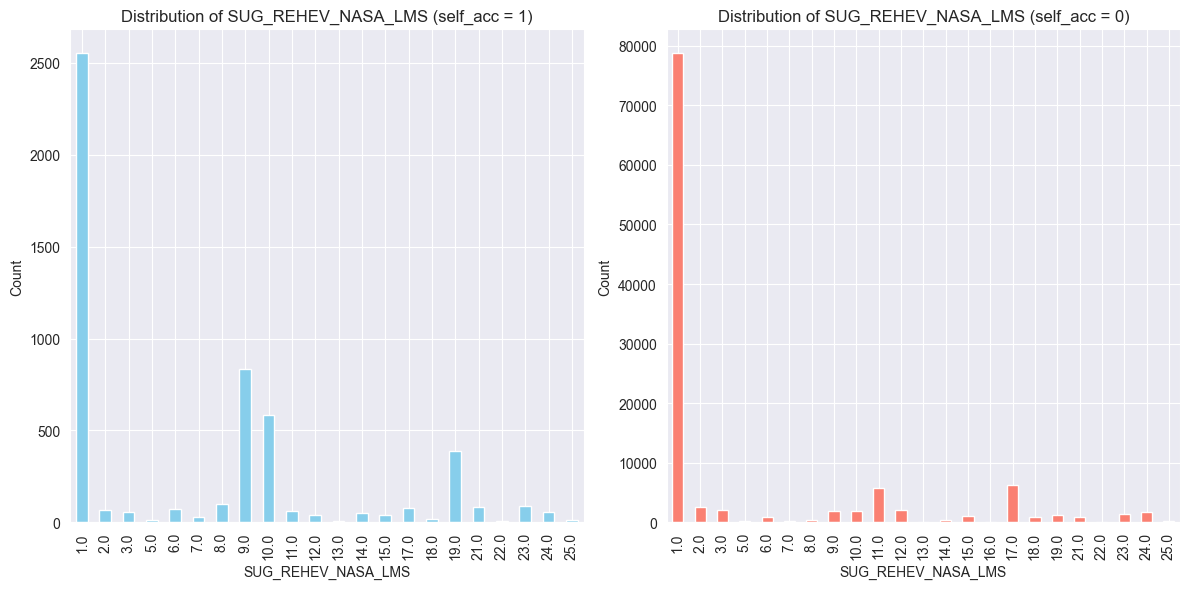

In [31]:
import matplotlib.pyplot as plt

# Filter df1 for self_acc = 1 and self_acc = 0
self_acc_ids = df1[df1['self_acc'] == 1]['pk_teuna_fikt']
non_self_acc_ids = df1[df1['self_acc'] == 0]['pk_teuna_fikt']

# Filter df2 based on these IDs
df2_self = df2[df2['pk_teuna_fikt'].isin(self_acc_ids)]
df2_non_self = df2[df2['pk_teuna_fikt'].isin(non_self_acc_ids)]

# Plot the distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
df2_self['SUG_REHEV_NASA_LMS'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Distribution of SUG_REHEV_NASA_LMS (self_acc = 1)")
plt.xlabel("SUG_REHEV_NASA_LMS")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
df2_non_self['SUG_REHEV_NASA_LMS'].value_counts().sort_index().plot(kind='bar', color='salmon')
plt.title("Distribution of SUG_REHEV_NASA_LMS (self_acc = 0)")
plt.xlabel("SUG_REHEV_NASA_LMS")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


In [ ]:
# this is getting interesting ... as we can see , many self claims are motorcycles

In [ ]:
# why would you claim insurance in this case ? a. big damage b.death ? c.you need ambulance and
# someone else called it ...

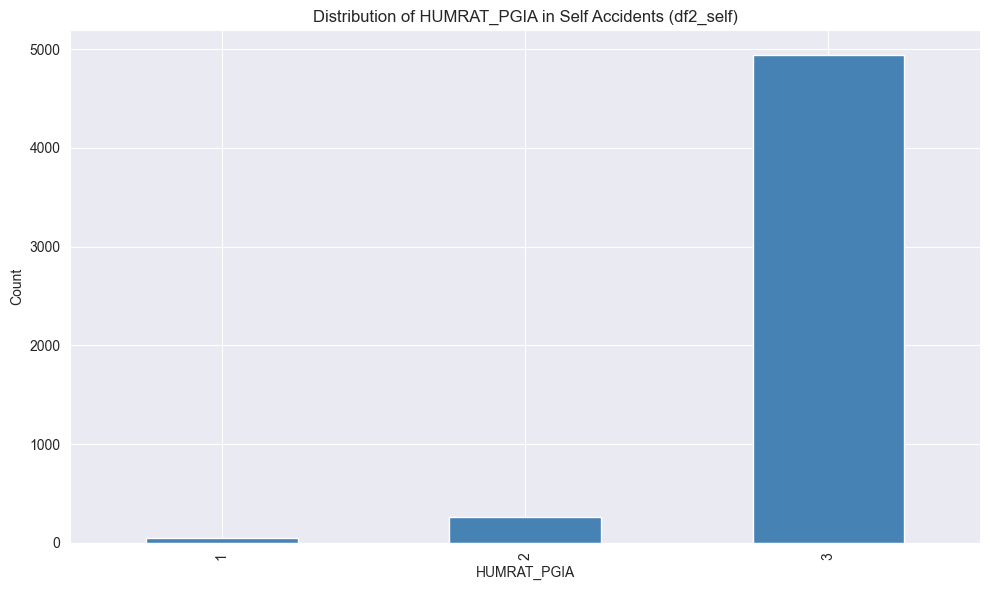

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df2_self['HUMRAT_PGIA'].value_counts().sort_index().plot(kind='bar', color='steelblue')
plt.title("Distribution of HUMRAT_PGIA in Self Accidents (df2_self)")
plt.xlabel("HUMRAT_PGIA")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [ ]:
# yeah .. seems like people just wrap themselves around trees or something .
# this is weird .

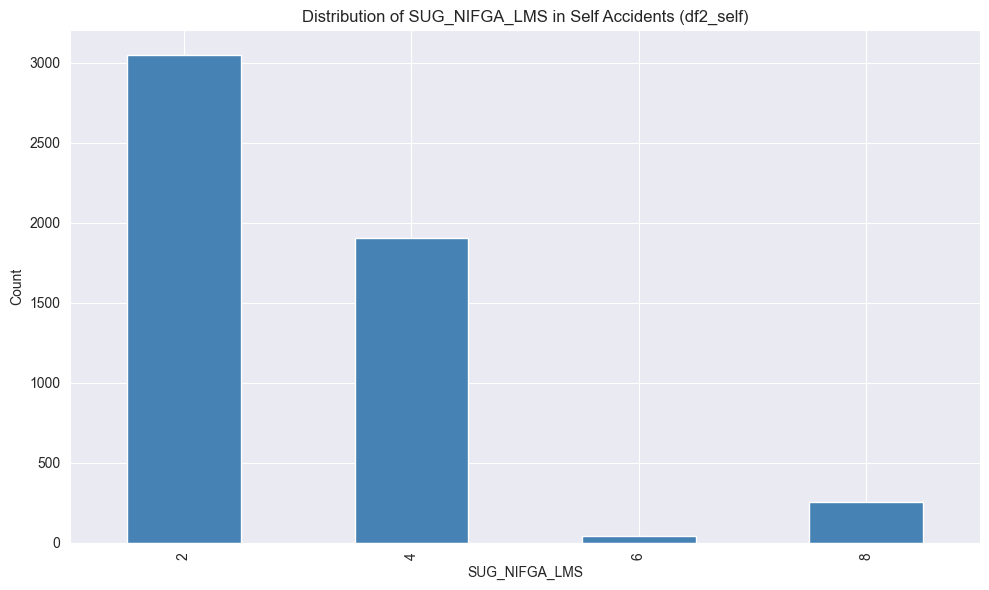

In [34]:


plt.figure(figsize=(10, 6))
df2_self['SUG_NIFGA_LMS'].value_counts().sort_index().plot(kind='bar', color='steelblue')
plt.title("Distribution of SUG_NIFGA_LMS in Self Accidents (df2_self)")
plt.xlabel("SUG_NIFGA_LMS")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [ ]:
# so we have 3K cars , and 2K bikes .. wow .. now we check in the non self .

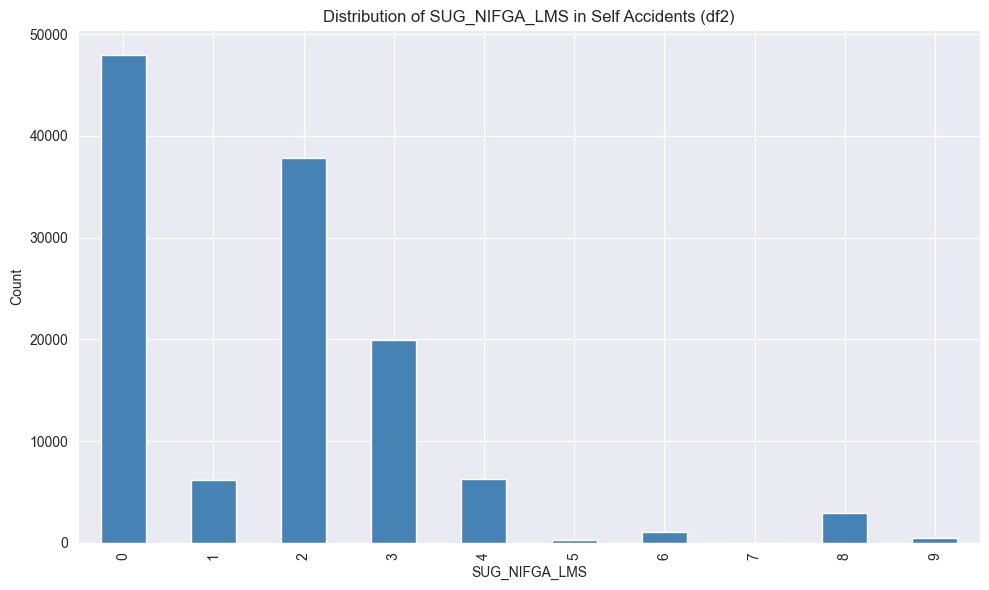

In [35]:
#check for whole df2 how many of which we have

plt.figure(figsize=(10, 6))
df2['SUG_NIFGA_LMS'].value_counts().sort_index().plot(kind='bar', color='steelblue')
plt.title("Distribution of SUG_NIFGA_LMS in Self Accidents (df2)")
plt.xlabel("SUG_NIFGA_LMS")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [ ]:
# notice zero means that the driver was not injured , we should split the df2 to moto or not ...

In [36]:
df2['bike'] = df2['SUG_REHEV_NASA_LMS'].apply(lambda x: 1 if x in [8, 9, 10, 19] else 0)

In [37]:
df2['bike'].sum()

np.int64(7405)

In [38]:
bike_counts = df2['bike'].value_counts()

print("Number of bike-related rows (bike == 1):", bike_counts.get(1, 0))
print("Number of non-bike-related rows (bike == 0):", bike_counts.get(0, 0))


Number of bike-related rows (bike == 1): 7405
Number of non-bike-related rows (bike == 0): 115564


In [39]:
df2.head(10)

,pk_teuna_fikt,MISPAR_REHEV_fikt,ZEHUT_fikt,SHNAT_TEUNA,HODESH_TEUNA,SUG_MEORAV,SHNAT_HOZAA,KVUZA_GIL,MIN,SUG_REHEV_NASA_LMS,...,KVUTZAT_OHLUSIYA_LMS,MAHOZ_MEGURIM,NAFA_MEGURIM,EZOR_TIVI_MEGURIM,MAAMAD_MINIZIPALI_MEGURIM,ZURAT_ISHUV_MEGURIM,SUG_TIK,ShimushBeAvizareyBetihut_LMS,PtiraMeuheret_LMS,bike
0,2020031644,0,2,2021,1,3,0,4,2,NaN,...,3,2.0,23,237.0,0.0,16.0,1,NaN,NaN,0
1,2020031644,1,1,2021,1,1,2005,8,1,1.0,...,2,2.0,23,237.0,0.0,25.0,1,NaN,NaN,0
2,2020079871,1,2,2021,1,2,2019,5,1,1.0,...,1,5.0,51,512.0,0.0,13.0,1,1.0,NaN,0
3,2020079871,2,1,2021,1,2,1991,10,1,6.0,...,2,2.0,24,243.0,99.0,28.0,1,NaN,NaN,0
4,2020081980,1,1,2021,1,3,0,14,1,1.0,...,1,1.0,11,111.0,0.0,12.0,1,NaN,NaN,0
5,2020081980,1,2,2021,1,2,1984,13,2,1.0,...,1,4.0,44,442.0,0.0,13.0,1,1.0,NaN,0
6,2020081980,2,3,2021,1,2,2011,6,1,1.0,...,1,1.0,11,111.0,0.0,12.0,1,NaN,NaN,0
7,2021000007,1,1,2021,12,3,0,12,1,18.0,...,1,3.0,31,311.0,0.0,13.0,1,NaN,NaN,0
8,2021000007,1,3,2021,12,1,0,15,1,18.0,...,1,2.0,24,246.0,0.0,15.0,1,NaN,NaN,0
9,2021000007,2,2,2021,12,2,1995,10,1,1.0,...,2,3.0,31,311.0,99.0,27.0,1,NaN,NaN,0


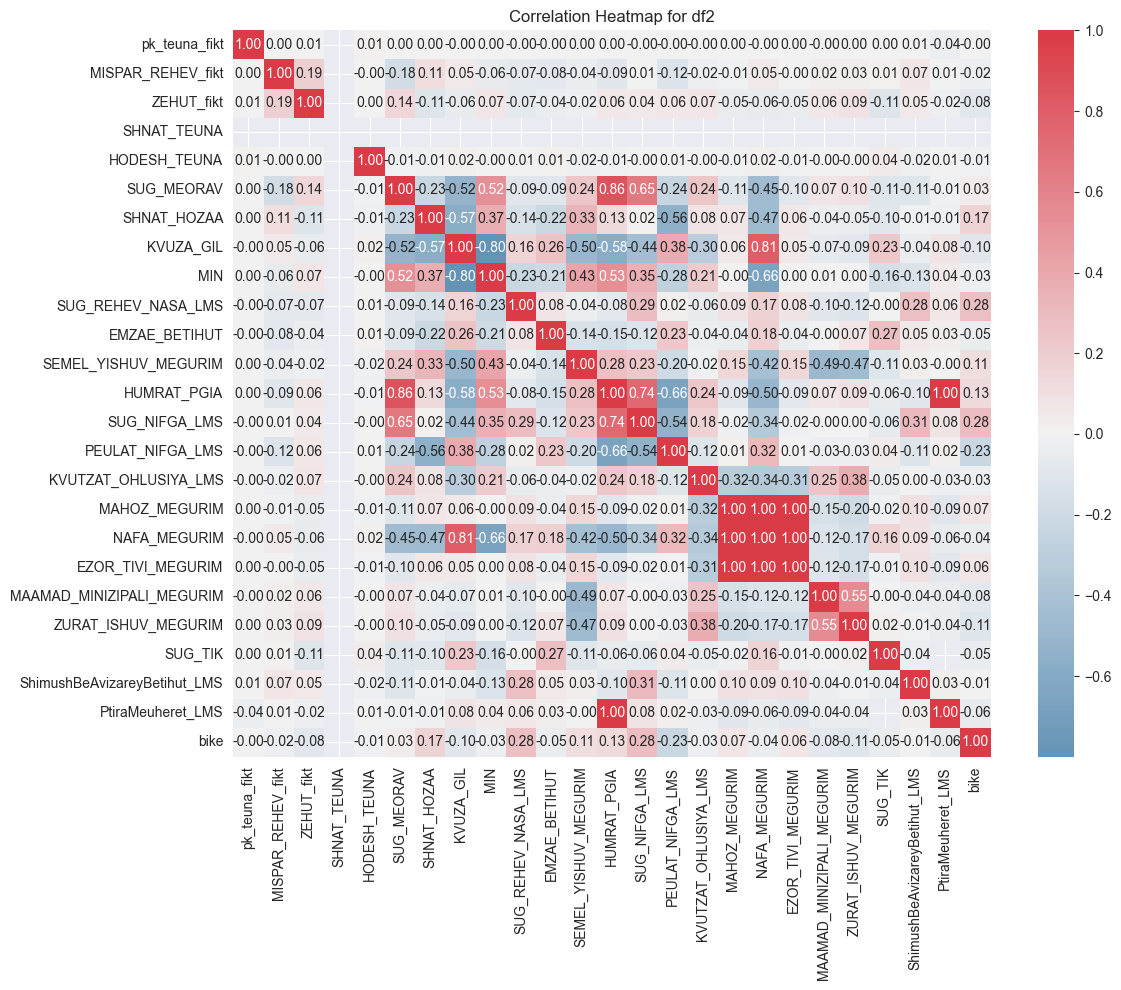

In [40]:
#we check correlation , maybe something there ..
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
corr_matrix = df2.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=sns.diverging_palette(240, 10, as_cmap=True), center=0, cbar=True)
plt.title("Correlation Heatmap for df2")
plt.tight_layout()
plt.show()


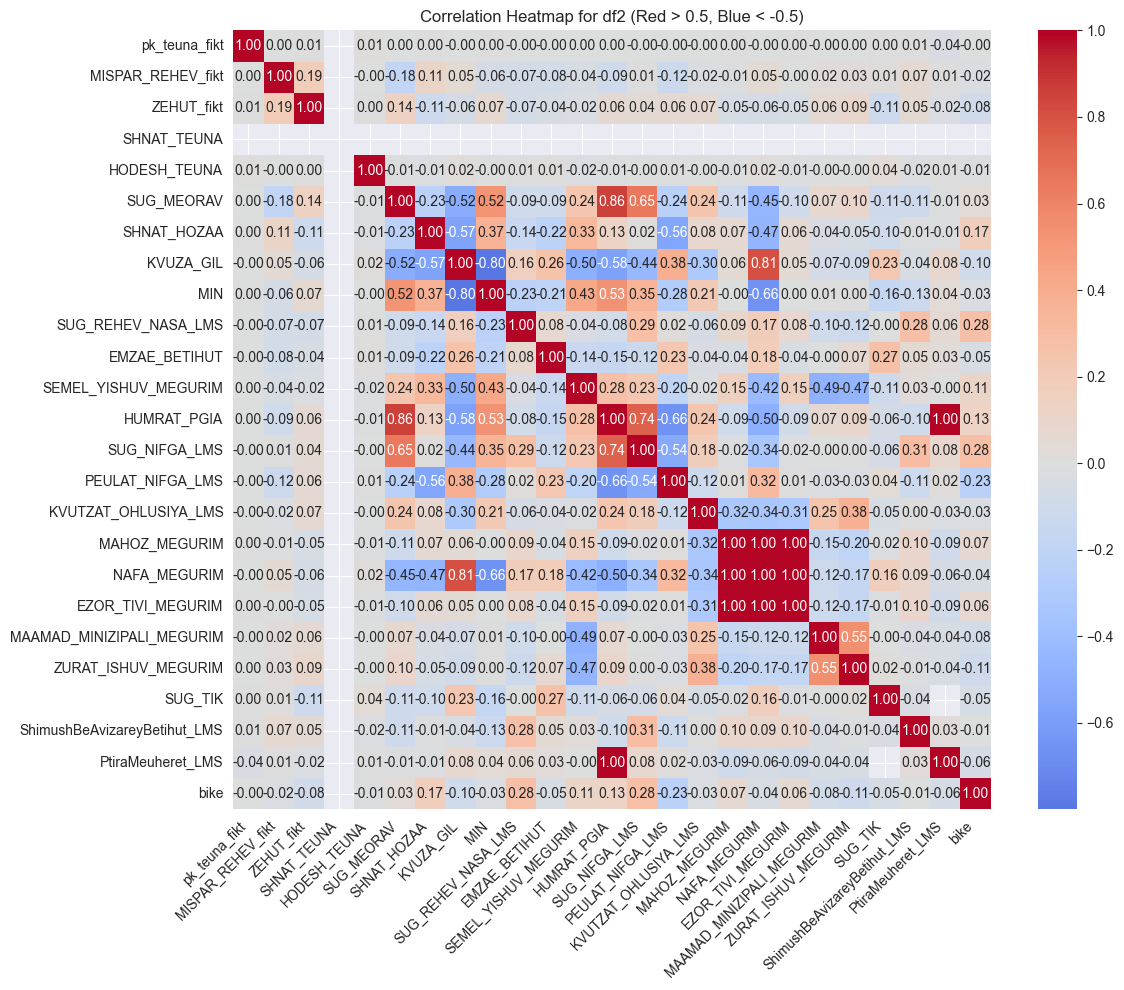

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
corr_matrix = df2.corr()

# Create a mask for values to color
mask_red = corr_matrix > 0.5
mask_blue = corr_matrix < -0.5

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, cbar=True)

plt.title("Correlation Heatmap for df2 (Red > 0.5, Blue < -0.5)")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [46]:
import pandas as pd

# Compute the correlation matrix
corr_matrix = df2.corr()

# Unstack the matrix to get pairs
corr_pairs = corr_matrix.unstack()

# Remove self-correlations
filtered_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

# Sort by absolute correlation value in descending order
sorted_pairs = filtered_pairs.abs().sort_values(ascending=False)

# Drop duplicate pairs (e.g., (A,B) and (B,A))
unique_pairs = sorted_pairs.groupby(sorted_pairs.index.map(frozenset)).first()

# Print the top correlated pairs
print(unique_pairs)

(PtiraMeuheret_LMS, HUMRAT_PGIA)                1.000000
(SUG_REHEV_NASA_LMS, PEULAT_NIFGA_LMS)          0.017454
(ShimushBeAvizareyBetihut_LMS, HODESH_TEUNA)    0.017949
(MAHOZ_MEGURIM, SUG_TIK)                        0.018120
(SUG_TIK, ZURAT_ISHUV_MEGURIM)                  0.018500
                                                  ...   
(SUG_TIK, SEMEL_YISHUV_MEGURIM)                 0.108589
(SUG_MEORAV, ShimushBeAvizareyBetihut_LMS)      0.110187
(ZURAT_ISHUV_MEGURIM, bike)                     0.110903
(SHNAT_HOZAA, MISPAR_REHEV_fikt)                0.112893
(PtiraMeuheret_LMS, SUG_TIK)                         NaN
Length: 300, dtype: float64


In [43]:
print(unique_pairs.head(20))

(PtiraMeuheret_LMS, HUMRAT_PGIA)                     1.000000
(SUG_REHEV_NASA_LMS, PEULAT_NIFGA_LMS)               0.017454
(ShimushBeAvizareyBetihut_LMS, HODESH_TEUNA)         0.017949
(MAHOZ_MEGURIM, SUG_TIK)                             0.018120
(SUG_TIK, ZURAT_ISHUV_MEGURIM)                       0.018500
(ZEHUT_fikt, SEMEL_YISHUV_MEGURIM)                   0.019673
(PtiraMeuheret_LMS, ZEHUT_fikt)                      0.020119
(HODESH_TEUNA, KVUZA_GIL)                            0.017196
(MISPAR_REHEV_fikt, bike)                            0.020408
(MISPAR_REHEV_fikt, MAAMAD_MINIZIPALI_MEGURIM)       0.023570
(bike, MIN)                                          0.026466
(MAAMAD_MINIZIPALI_MEGURIM, PEULAT_NIFGA_LMS)        0.026488
(PtiraMeuheret_LMS, EMZAE_BETIHUT)                   0.027305
(MISPAR_REHEV_fikt, ZURAT_ISHUV_MEGURIM)             0.027314
(ShimushBeAvizareyBetihut_LMS, PtiraMeuheret_LMS)    0.029058
(KVUTZAT_OHLUSIYA_LMS, MISPAR_REHEV_fikt)            0.021889
(PtiraMe

C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


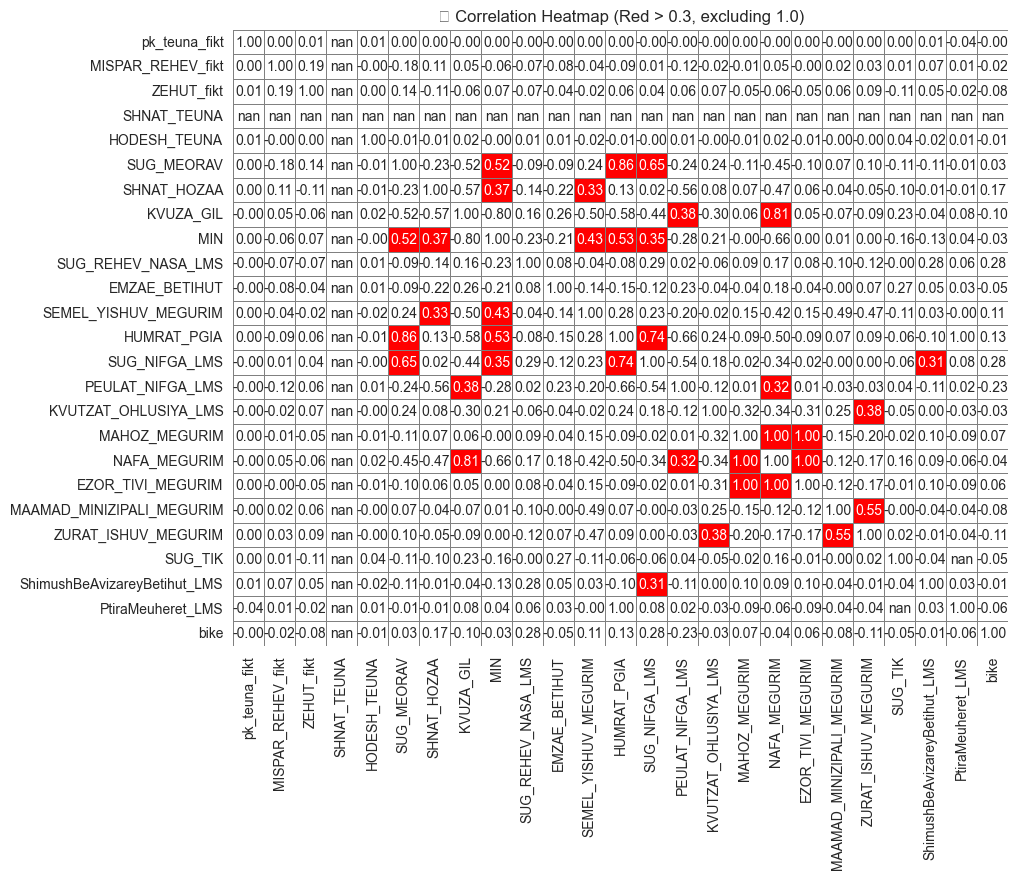

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute correlation matrix
corr_matrix = df2.corr()

# Mask for values to highlight (above 0.3 but not 1.0)
highlight_mask = (corr_matrix > 0.3) & (corr_matrix != 1.0)

# Create a custom color map: red for highlight, white for others
cmap = sns.color_palette(["white", "red"])

# Create a matrix for plotting: 1 where highlight, 0 elsewhere
plot_matrix = highlight_mask.astype(int)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(plot_matrix, annot=corr_matrix.round(2), fmt=".2f", cmap=cmap, cbar=False, linewidths=0.5, linecolor='gray')
plt.title("🔴 Correlation Heatmap (Red > 0.3, excluding 1.0)")
plt.show()

In [53]:
import pandas as pd

# Compute correlation matrix
corr_matrix = df2.corr()

# Unstack to get pairs
corr_pairs = corr_matrix.unstack()

# Remove self-correlations
filtered_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

# Drop duplicate pairs (e.g., (A,B) and (B,A))
unique_pairs = filtered_pairs.groupby(filtered_pairs.index.map(frozenset)).first().dropna()

# Sort by absolute correlation
sorted_pairs = unique_pairs.sort_values(key=lambda x: x.abs(), ascending=False)

# Top 10 most correlated pairs
print("🔝 Top 10 Most Correlated Feature Pairs:")
print(sorted_pairs.head(50))

# Bottom 10 least correlated pairs
print("\n🔻 Bottom 10 Least Correlated Feature Pairs:")
print(sorted_pairs.tail(10))

🔝 Top 10 Most Correlated Feature Pairs:
(PtiraMeuheret_LMS, HUMRAT_PGIA)                      1.000000
(EZOR_TIVI_MEGURIM, NAFA_MEGURIM)                     0.999543
(MAHOZ_MEGURIM, NAFA_MEGURIM)                         0.996641
(EZOR_TIVI_MEGURIM, MAHOZ_MEGURIM)                    0.996035
(SUG_MEORAV, HUMRAT_PGIA)                             0.862289
(NAFA_MEGURIM, KVUZA_GIL)                             0.809674
(MIN, KVUZA_GIL)                                     -0.799970
(SUG_NIFGA_LMS, HUMRAT_PGIA)                          0.742779
(NAFA_MEGURIM, MIN)                                  -0.662152
(PEULAT_NIFGA_LMS, HUMRAT_PGIA)                      -0.659717
(SUG_NIFGA_LMS, SUG_MEORAV)                           0.650581
(HUMRAT_PGIA, KVUZA_GIL)                             -0.581173
(SHNAT_HOZAA, KVUZA_GIL)                             -0.569104
(SHNAT_HOZAA, PEULAT_NIFGA_LMS)                      -0.555141
(MAAMAD_MINIZIPALI_MEGURIM, ZURAT_ISHUV_MEGURIM)      0.546520
(SUG_NIFGA_LMS,

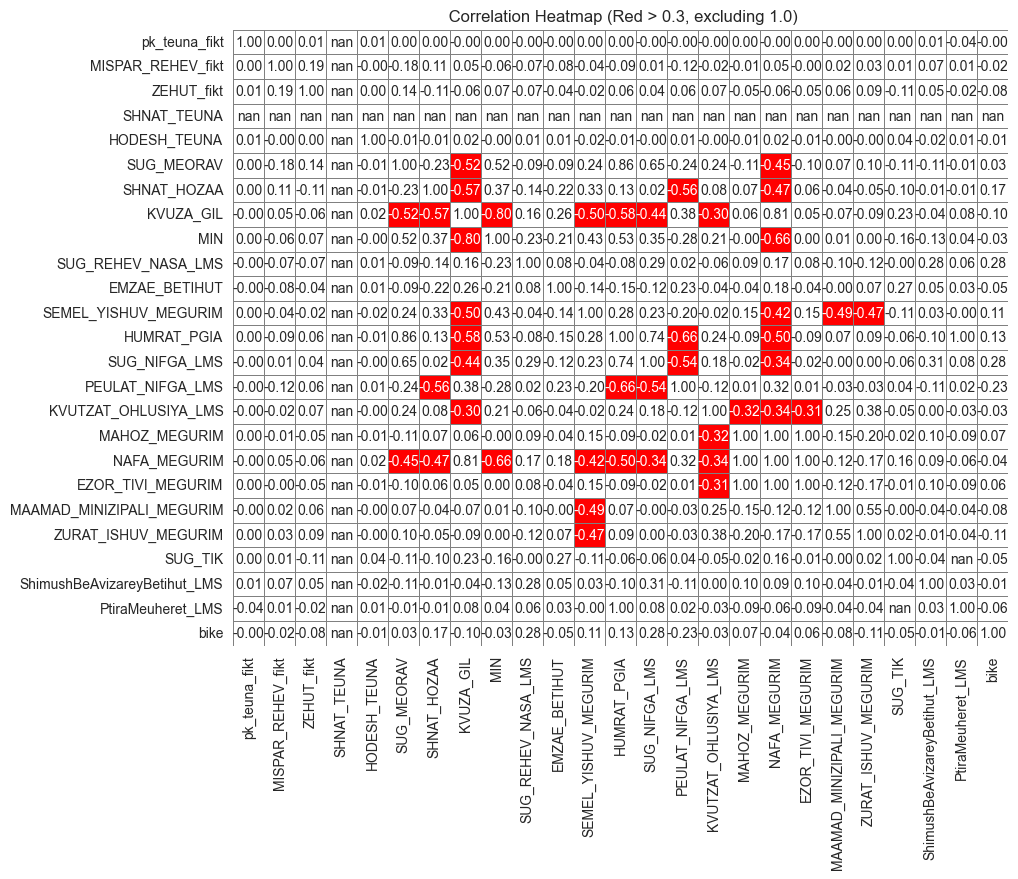

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute correlation matrix
corr_matrix = df2.corr()

# Mask for values to highlight (above 0.3 but not 1.0)
highlight_mask = (corr_matrix < -0.3) & (corr_matrix != 1.0)

# Create a custom color map: red for highlight, white for others
cmap = sns.color_palette(["white", "red"])

# Create a matrix for plotting: 1 where highlight, 0 elsewhere
plot_matrix = highlight_mask.astype(int)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(plot_matrix, annot=corr_matrix.round(2), fmt=".2f", cmap=cmap, cbar=False, linewidths=0.5, linecolor='gray')
plt.title(" Correlation Heatmap (Red > 0.3, excluding 1.0)")
plt.show()

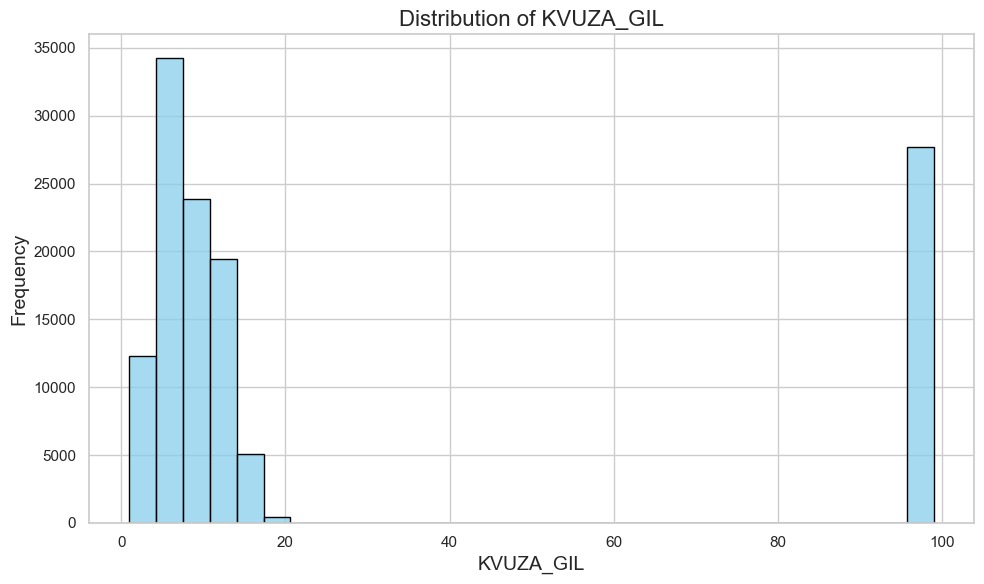

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot distribution
plt.figure(figsize=(10, 6))
sns.histplot(df2["KVUZA_GIL"], bins=30, kde=False, color="skyblue", edgecolor="black")

# Add labels and title
plt.title("Distribution of KVUZA_GIL", fontsize=16)
plt.xlabel("KVUZA_GIL", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
# remove the 99 = unknown (HOW DONT YOU KNOW?!) , check for normality..


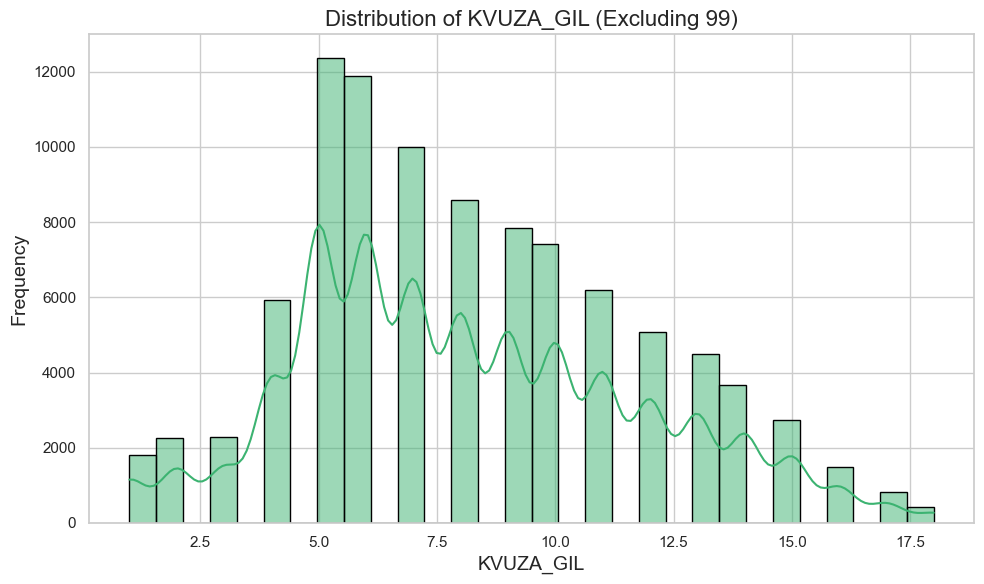

C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 95302.
  res = hypotest_fun_out(*samples, **kwds)


📊 Shapiro-Wilk Test:
Statistic = 0.9718, p-value = 0.0000

📊 Kolmogorov-Smirnov Test:
Statistic = 0.1157, p-value = 0.0000


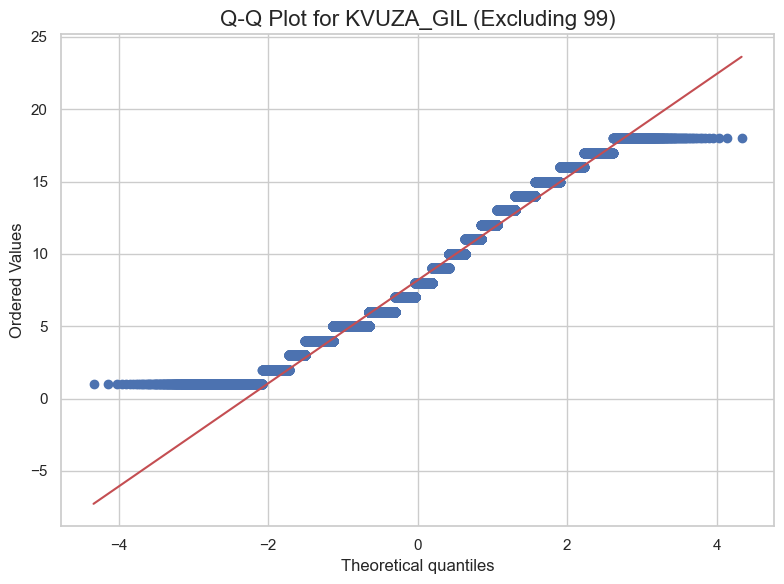

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, kstest, norm, probplot

# Step 1: Filter the data
filtered_data = df2[df2["KVUZA_GIL"] != 99]["KVUZA_GIL"].dropna()

# Step 2: Plot histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data, bins=30, kde=True, color="mediumseagreen", edgecolor="black")
plt.title("Distribution of KVUZA_GIL (Excluding 99)", fontsize=16)
plt.xlabel("KVUZA_GIL", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.tight_layout()
plt.show()

# Step 3: Normality tests
shapiro_stat, shapiro_p = shapiro(filtered_data)
ks_stat, ks_p = kstest(filtered_data, 'norm', args=(filtered_data.mean(), filtered_data.std()))

print("📊 Shapiro-Wilk Test:")
print(f"Statistic = {shapiro_stat:.4f}, p-value = {shapiro_p:.4f}")
print("\n📊 Kolmogorov-Smirnov Test:")
print(f"Statistic = {ks_stat:.4f}, p-value = {ks_p:.4f}")

# Step 4: Q-Q plot
plt.figure(figsize=(8, 6))
probplot(filtered_data, dist="norm", plot=plt)
plt.title("Q-Q Plot for KVUZA_GIL (Excluding 99)", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# we should only check for ages of drivers .. not infants and so on , as the driver is the interest.
# lets filter based on sug meorav ?

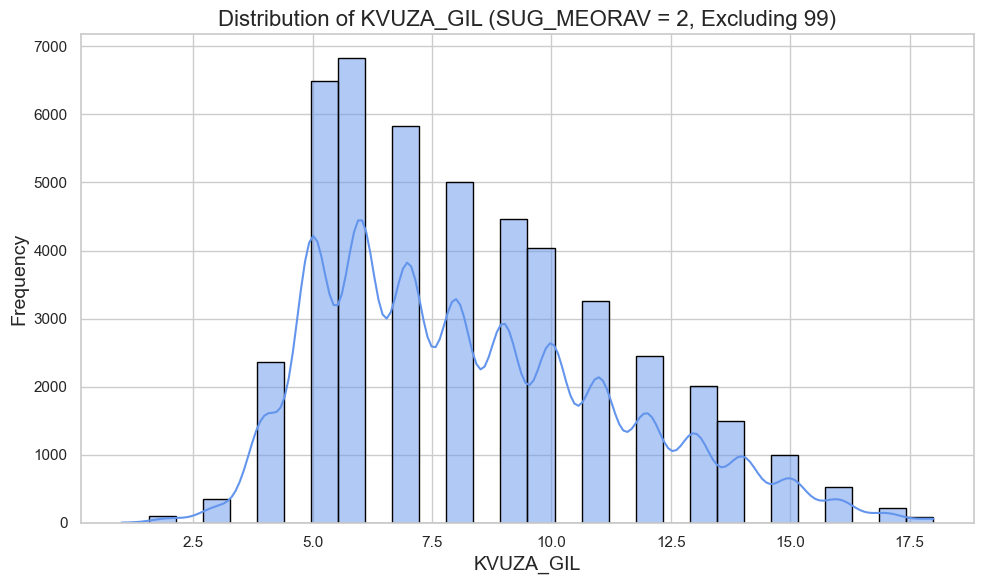

C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 46530.
  res = hypotest_fun_out(*samples, **kwds)


📊 Shapiro-Wilk Test (df_naag):
Statistic = 0.9487, p-value = 0.0000

📊 Kolmogorov-Smirnov Test (df_naag):
Statistic = 0.1370, p-value = 0.0000


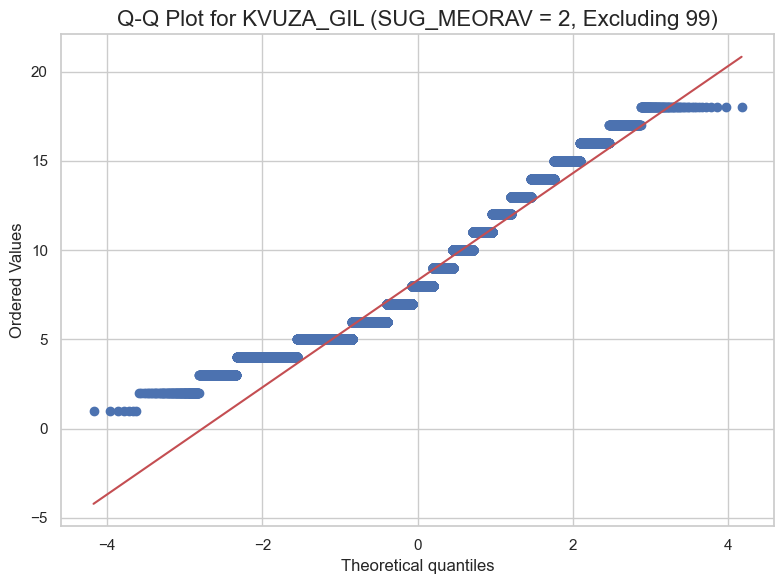

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, kstest, probplot, norm

# Step 1: Create df_naag where SUG_MEORAV == 2
df_naag = df2[df2["SUG_MEORAV"] == 2]

# Step 2: Filter KVUZA_GIL != 99 and drop NaNs
filtered_naag = df_naag[df_naag["KVUZA_GIL"] != 99]["KVUZA_GIL"].dropna()

# Step 3: Plot distribution with KDE
plt.figure(figsize=(10, 6))
sns.histplot(filtered_naag, bins=30, kde=True, color="cornflowerblue", edgecolor="black")
plt.title("Distribution of KVUZA_GIL (SUG_MEORAV = 2, Excluding 99)", fontsize=16)
plt.xlabel("KVUZA_GIL", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.tight_layout()
plt.show()

# Step 4: Normality tests
shapiro_stat, shapiro_p = shapiro(filtered_naag)
ks_stat, ks_p = kstest(filtered_naag, 'norm', args=(filtered_naag.mean(), filtered_naag.std()))

print("📊 Shapiro-Wilk Test (df_naag):")
print(f"Statistic = {shapiro_stat:.4f}, p-value = {shapiro_p:.4f}")
print("\n📊 Kolmogorov-Smirnov Test (df_naag):")
print(f"Statistic = {ks_stat:.4f}, p-value = {ks_p:.4f}")

# Step 5: Q-Q plot
plt.figure(figsize=(8, 6))
probplot(filtered_naag, dist="norm", plot=plt)
plt.title("Q-Q Plot for KVUZA_GIL (SUG_MEORAV = 2, Excluding 99)", fontsize=16)
plt.tight_layout()
plt.show()

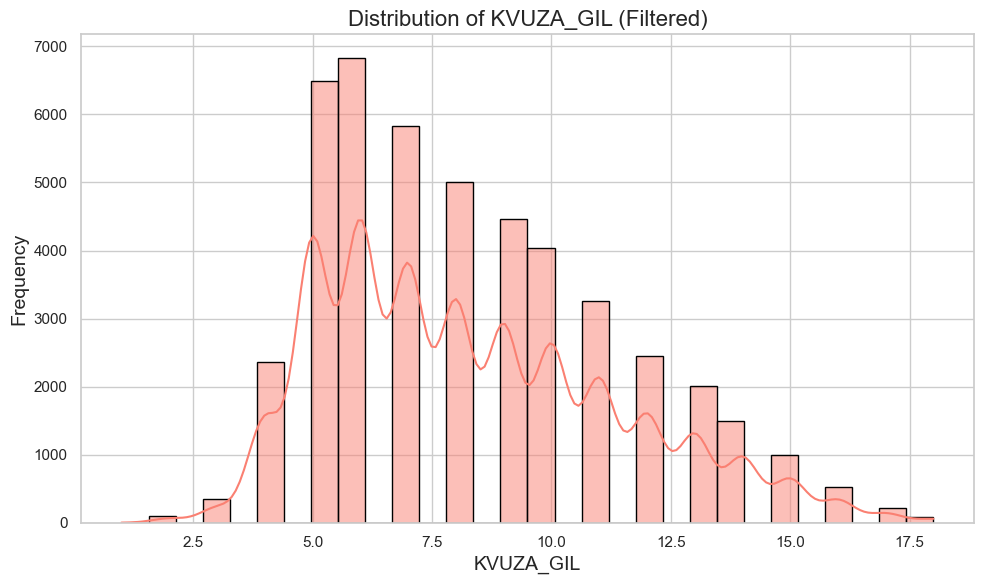

C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 46530.
  res = hypotest_fun_out(*samples, **kwds)


📊 Shapiro-Wilk Test:
Statistic = 0.9487, p-value = 0.0000

📊 Kolmogorov-Smirnov Test:
Statistic = 0.1370, p-value = 0.0000


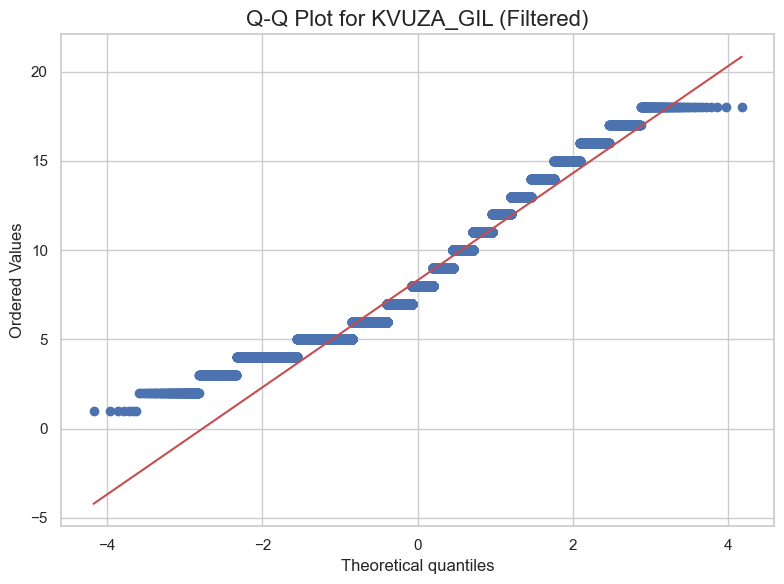

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, kstest, probplot, norm

# Step 1: Filter df2 to create df_naag
df_naag = df2[
    (df2["SUG_MEORAV"] == 2) &
    (df2["SUG_NIFGA_LMS"] != 1) &
    (df2["KVUZA_GIL"] != 99)
]

# Step 2: Extract KVUZA_GIL and drop NaNs
filtered_kvuza = df_naag["KVUZA_GIL"].dropna()

# Step 3: Plot distribution with KDE
plt.figure(figsize=(10, 6))
sns.histplot(filtered_kvuza, bins=30, kde=True, color="salmon", edgecolor="black")
plt.title("Distribution of KVUZA_GIL (Filtered)", fontsize=16)
plt.xlabel("KVUZA_GIL", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.tight_layout()
plt.show()

# Step 4: Normality tests
shapiro_stat, shapiro_p = shapiro(filtered_kvuza)
ks_stat, ks_p = kstest(filtered_kvuza, 'norm', args=(filtered_kvuza.mean(), filtered_kvuza.std()))

print("📊 Shapiro-Wilk Test:")
print(f"Statistic = {shapiro_stat:.4f}, p-value = {shapiro_p:.4f}")
print("\n📊 Kolmogorov-Smirnov Test:")
print(f"Statistic = {ks_stat:.4f}, p-value = {ks_p:.4f}")

# Step 5: Q-Q plot
plt.figure(figsize=(8, 6))
probplot(filtered_kvuza, dist="norm", plot=plt)
plt.title("Q-Q Plot for KVUZA_GIL (Filtered)", fontsize=16)
plt.tight_layout()
plt.show()

In [60]:
import pandas as pd
import scipy.stats as stats

# Filter relevant rows
df_filtered = df2[df2["SUG_REHEV_NASA_LMS"].isin([1, 8, 9, 10, 19])].copy()

df_filtered["vehicle_type"] = df_filtered["SUG_REHEV_NASA_LMS"].apply(
    lambda x: "Car" if x == 1 else "Motorcycle"
)

# Create contingency table
contingency = pd.crosstab(df_filtered["vehicle_type"], df_filtered["HUMRAT_PGIA"])

# Run chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency)

print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("\nContingency Table:")
print(contingency)

Chi-square statistic: 4385.791593390339
p-value: 0.0
Degrees of freedom: 3

Contingency Table:
HUMRAT_PGIA       0    1    2      3
vehicle_type                        
Car           31293  117  684  49255
Motorcycle      812   86  567   5940


In [ ]:
# we reject null H , bikes are far more dangerouis .


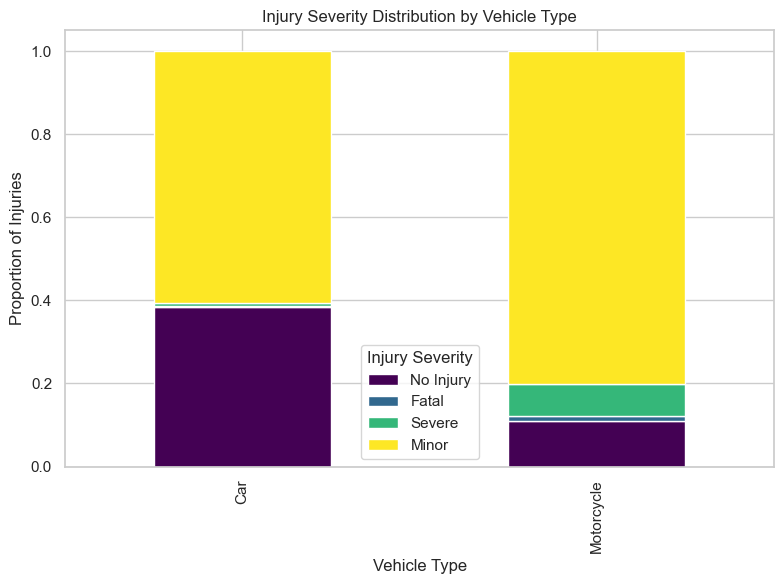

In [64]:
import matplotlib.pyplot as plt

# Group and normalize injury severity
injury_counts = df_filtered.groupby("vehicle_type")["HUMRAT_PGIA"].value_counts(normalize=True).unstack()

# Plot
injury_counts.plot(kind="bar", stacked=True, colormap="viridis", figsize=(8,6))
plt.title("Injury Severity Distribution by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Proportion of Injuries")
plt.legend(title="Injury Severity", labels=["No Injury", "Fatal", "Severe", "Minor"])
plt.tight_layout()
plt.show()

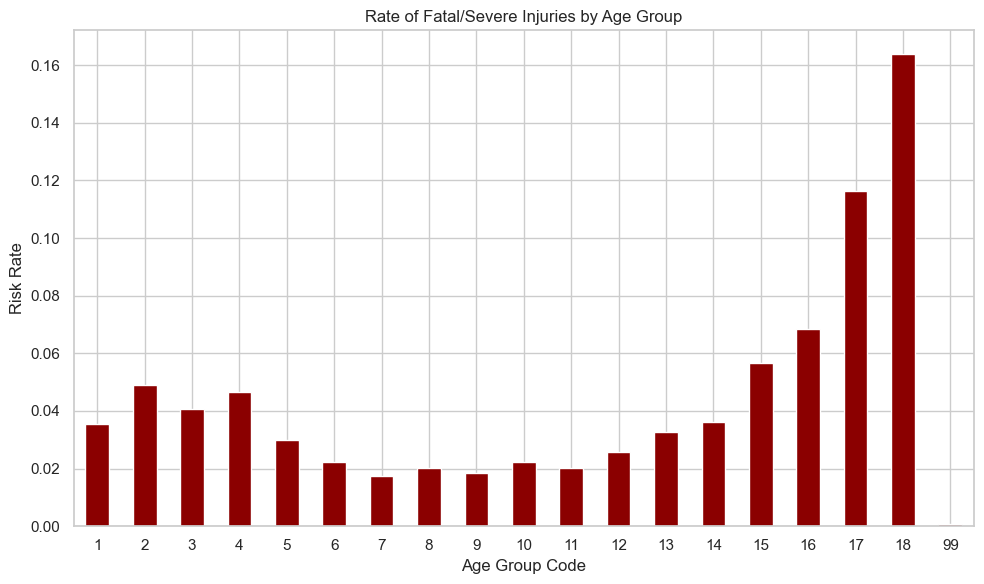

In [65]:
# Filter fatal and severe injuries
dangerous = df2[df2["HUMRAT_PGIA"].isin([1, 2])]

# Group by age
age_danger = dangerous["KVUZA_GIL"].value_counts().sort_index()

# Normalize by total cases per age group
age_total = df2["KVUZA_GIL"].value_counts().sort_index()
age_risk_rate = (age_danger / age_total).fillna(0)

# Plot
age_risk_rate.plot(kind="bar", color="darkred", figsize=(10,6))
plt.title("Rate of Fatal/Severe Injuries by Age Group")
plt.xlabel("Age Group Code")
plt.ylabel("Risk Rate")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [66]:
import statsmodels.api as sm
import numpy as np

# Create binary outcome: 1 = fatal/severe, 0 = minor/no injury
df_filtered["severe_or_fatal"] = df_filtered["HUMRAT_PGIA"].apply(lambda x: 1 if x in [1,2] else 0)

# Encode vehicle type
df_filtered["is_motorcycle"] = df_filtered["vehicle_type"].apply(lambda x: 1 if x == "Motorcycle" else 0)

# Optional: add age and gender
df_filtered["age_group"] = df_filtered["KVUZA_GIL"]
df_filtered["gender"] = df_filtered["MIN"]

# Drop NA rows
model_df = df_filtered[["severe_or_fatal", "is_motorcycle", "age_group", "gender"]].dropna()

# One-hot encode categorical variables
model_df = pd.get_dummies(model_df, columns=["age_group", "gender"], drop_first=True)

# Define X and y
X = model_df.drop("severe_or_fatal", axis=1)
y = model_df["severe_or_fatal"]

# Add constant
X = sm.add_constant(X)

# Fit logistic regression
model = sm.Logit(y, X).fit()
print(model.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [67]:
import statsmodels.api as sm
import numpy as np

# Step 1: Create binary outcome
df_filtered["severe_or_fatal"] = df_filtered["HUMRAT_PGIA"].apply(lambda x: 1 if x in [1, 2] else 0)

# Step 2: Encode vehicle type
df_filtered["is_motorcycle"] = df_filtered["vehicle_type"].apply(lambda x: 1 if x == "Motorcycle" else 0)

# Step 3: Select relevant columns
model_df = df_filtered[["severe_or_fatal", "is_motorcycle", "KVUZA_GIL", "MIN"]].dropna()

# Step 4: Convert categorical variables to strings (for one-hot encoding)
model_df["KVUZA_GIL"] = model_df["KVUZA_GIL"].astype(str)
model_df["MIN"] = model_df["MIN"].astype(str)

# Step 5: One-hot encode
model_df = pd.get_dummies(model_df, columns=["KVUZA_GIL", "MIN"], drop_first=True)

# Step 6: Define X and y
y = model_df["severe_or_fatal"].astype(float)
X = model_df.drop("severe_or_fatal", axis=1).astype(float)

# Step 7: Add constant
X = sm.add_constant(X)

# Step 8: Fit model
model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.072462
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:        severe_or_fatal   No. Observations:                88754
Model:                          Logit   Df Residuals:                    88732
Method:                           MLE   Df Model:                           21
Date:                Thu, 14 Aug 2025   Pseudo R-squ.:                  0.1333
Time:                        14:11:19   Log-Likelihood:                -6431.3
converged:                       True   LL-Null:                       -7420.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -5.0271      5.420     -0.928      0.354     -15.650       5.595
is_motorcycle     2

In [68]:
import numpy as np

def explain_logit_model(model):
    print("📊 Logistic Regression Summary\n")

    # Overall model stats
    print(f"Number of observations: {model.nobs}")
    print(f"Pseudo R-squared: {model.prsquared:.4f}")
    print(f"Log-Likelihood: {model.llf:.1f}")
    print(f"Model significance (LLR p-value): {model.llr_pvalue:.4g}")
    print("\n---\n")

    # Extract coefficients
    coef = model.params
    pvals = model.pvalues
    conf = model.conf_int()

    # Motorcycle effect
    if "is_motorcycle" in coef:
        odds_ratio = np.exp(coef["is_motorcycle"])
        print(f"🏍️ Motorcycle Risk:")
        print(f"  Coefficient: {coef['is_motorcycle']:.4f}")
        print(f"  Odds Ratio: {odds_ratio:.2f}")
        print(f"  p-value: {pvals['is_motorcycle']:.4g}")
        if pvals["is_motorcycle"] < 0.05:
            print("  ✅ Statistically significant: Motorcyclists are more likely to suffer severe/fatal injuries.\n")
        else:
            print("  ❌ Not statistically significant.\n")

    # Age group effects
    print("👶🧓 Age Group Effects:")
    age_vars = [v for v in coef.index if v.startswith("KVUZA_GIL_")]
    for var in age_vars:
        odds = np.exp(coef[var])
        sig = pvals[var] < 0.05
        marker = "✅" if sig else "❌"
        print(f"  {var}: Odds Ratio = {odds:.2f}, p = {pvals[var]:.4g} {marker}")
    print("\n---\n")

    # Gender effects
    print("🚻 Gender Effects:")
    gender_vars = [v for v in coef.index if v.startswith("MIN_")]
    for var in gender_vars:
        odds = np.exp(coef[var])
        sig = pvals[var] < 0.05
        marker = "✅" if sig else "❌"
        print(f"  {var}: Odds Ratio = {odds:.2f}, p = {pvals[var]:.4g} {marker}")

In [69]:
explain_logit_model(model)


📊 Logistic Regression Summary

Number of observations: 88754
Pseudo R-squared: 0.1333
Log-Likelihood: -6431.3
Model significance (LLR p-value): 0

---

🏍️ Motorcycle Risk:
  Coefficient: 2.1032
  Odds Ratio: 8.19
  p-value: 9.77e-254
  ✅ Statistically significant: Motorcyclists are more likely to suffer severe/fatal injuries.

👶🧓 Age Group Effects:
  KVUZA_GIL_10: Odds Ratio = 0.76, p = 0.2938 ❌
  KVUZA_GIL_11: Odds Ratio = 0.67, p = 0.1373 ❌
  KVUZA_GIL_12: Odds Ratio = 0.95, p = 0.8323 ❌
  KVUZA_GIL_13: Odds Ratio = 1.16, p = 0.5737 ❌
  KVUZA_GIL_14: Odds Ratio = 1.49, p = 0.1368 ❌
  KVUZA_GIL_15: Odds Ratio = 1.97, p = 0.01168 ✅
  KVUZA_GIL_16: Odds Ratio = 1.76, p = 0.06816 ❌
  KVUZA_GIL_17: Odds Ratio = 3.13, p = 0.0005489 ✅
  KVUZA_GIL_18: Odds Ratio = 3.66, p = 0.0004806 ✅
  KVUZA_GIL_2: Odds Ratio = 1.07, p = 0.8227 ❌
  KVUZA_GIL_3: Odds Ratio = 0.51, p = 0.09091 ❌
  KVUZA_GIL_4: Odds Ratio = 1.36, p = 0.2103 ❌
  KVUZA_GIL_5: Odds Ratio = 1.02, p = 0.9333 ❌
  KVUZA_GIL_6: Odds 

In [ ]:
# lol , we get that 30-34 have less chance to get into fatal crash .. weird ..

In [76]:
import numpy as np
import matplotlib.pyplot as plt

def plot_odds_ratios(model, title="Odds Ratios with 95% CI"):
    # Extract coefficients, p-values, and confidence intervals
    coef = model.params
    pvals = model.pvalues
    conf = model.conf_int()

    # Calculate odds ratios and CI bounds
    odds_ratios = np.exp(coef)
    ci_lower = np.exp(conf[0])
    ci_upper = np.exp(conf[1])

    # Filter out intercept and non-significant variables
    variables = coef.index
    mask = (variables != "const") & (pvals < 0.05)

    filtered_vars = variables[mask]
    filtered_odds = odds_ratios[mask]
    filtered_lower = ci_lower[mask]
    filtered_upper = ci_upper[mask]

    # Sort by odds ratio
        # Sort by odds ratio
    sorted_idx = np.argsort(filtered_odds.values)
    sorted_vars = filtered_vars[sorted_idx]
    sorted_odds = filtered_odds.iloc[sorted_idx]
    sorted_lower = filtered_lower.iloc[sorted_idx]
    sorted_upper = filtered_upper.iloc[sorted_idx]
    labels = [age_map.get(var, var) for var in sorted_vars]


    # Plot
    plt.figure(figsize=(10, 6))
    plt.errorbar(sorted_odds, range(len(sorted_vars)),
                 xerr=[sorted_odds - sorted_lower, sorted_upper - sorted_odds],
                 fmt='o', color='darkred', ecolor='gray', capsize=4)

    plt.yticks(range(len(sorted_vars)), labels)

    plt.axvline(x=1, color='black', linestyle='--', label="No Effect")
    plt.xlabel("Odds Ratio")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

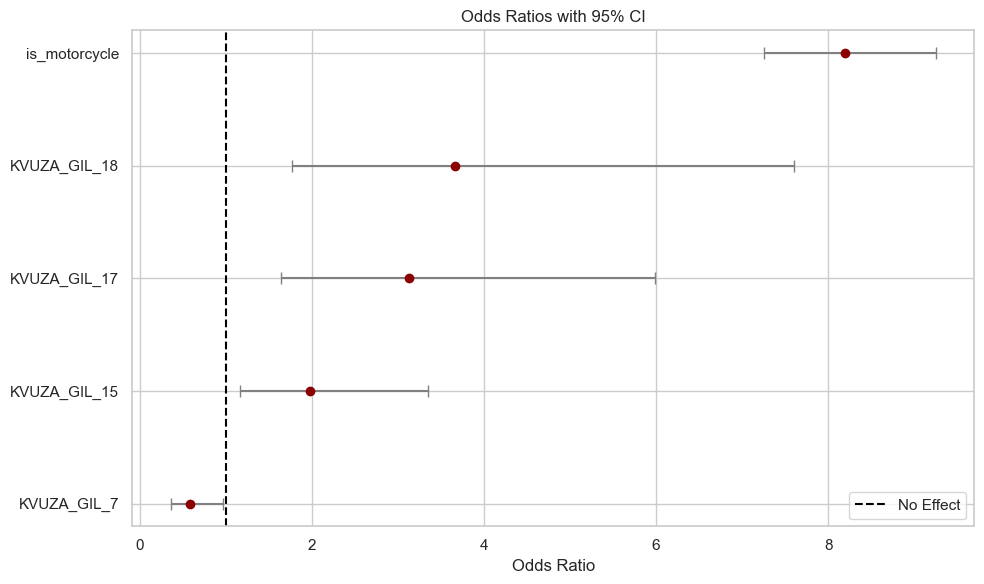

In [73]:
plot_odds_ratios(model)

In [74]:
age_map = {
    "KVUZA_GIL_1": "00–04",
    "KVUZA_GIL_2": "05–09",
    "KVUZA_GIL_3": "10–14",
    "KVUZA_GIL_4": "15–19",
    "KVUZA_GIL_5": "20–24",
    "KVUZA_GIL_6": "25–29",
    "KVUZA_GIL_7": "30–34",
    "KVUZA_GIL_8": "35–39",
    "KVUZA_GIL_9": "40–44",
    "KVUZA_GIL_10": "45–49",
    "KVUZA_GIL_11": "50–54",
    "KVUZA_GIL_12": "55–59",
    "KVUZA_GIL_13": "60–64",
    "KVUZA_GIL_14": "65–69",
    "KVUZA_GIL_15": "70–74",
    "KVUZA_GIL_16": "75–79",
    "KVUZA_GIL_17": "80–84",
    "KVUZA_GIL_18": "85+",
    "KVUZA_GIL_99": "Unknown"
}

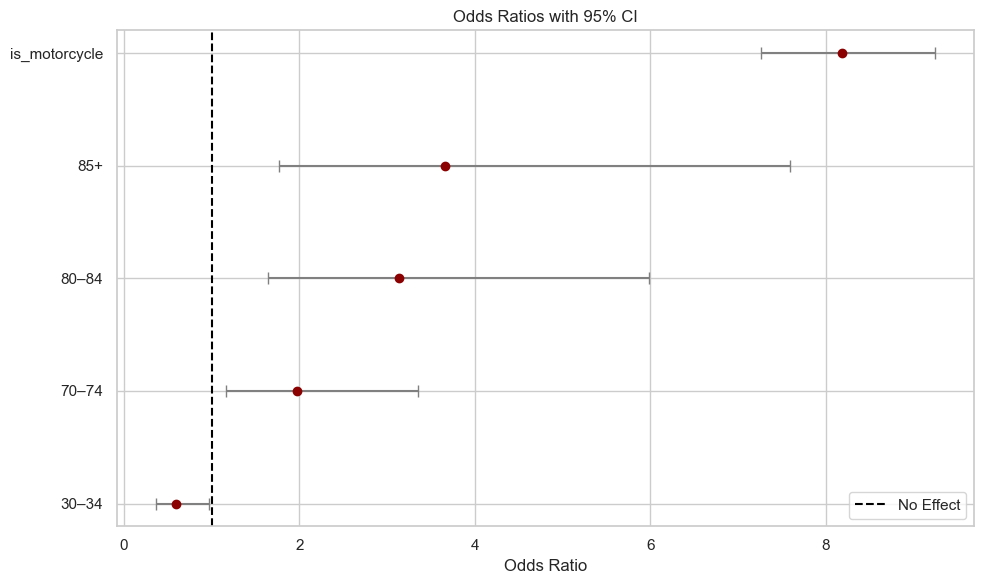

In [77]:
plot_odds_ratios(model)

In [78]:
# Filter for motorcycle crashes
motorcycle_df = df2[df2["SUG_REHEV_NASA_LMS"].isin([8, 9, 10, 19])]

# Filter for fatal injuries (HUMRAT_PGIA == 1)
fatal_motorcycle = motorcycle_df[motorcycle_df["HUMRAT_PGIA"] == 1]

# Count fatalities by age group
fatal_by_age = fatal_motorcycle["KVUZA_GIL"].value_counts().sort_index()

# Optional: map age codes to readable ranges
age_map = {
    1: "00–04", 2: "05–09", 3: "10–14", 4: "15–19", 5: "20–24",
    6: "25–29", 7: "30–34", 8: "35–39", 9: "40–44", 10: "45–49",
    11: "50–54", 12: "55–59", 13: "60–64", 14: "65–69", 15: "70–74",
    16: "75–79", 17: "80–84", 18: "85+", 99: "Unknown"
}

# Rename index
fatal_by_age.index = fatal_by_age.index.map(age_map)

# Display result
print("🛵 Fatalities by Age Group (Motorcycles):\n")
print(fatal_by_age)

🛵 Fatalities by Age Group (Motorcycles):

KVUZA_GIL
15–19    10
20–24    23
25–29    15
30–34     7
35–39     8
40–44     6
45–49     6
50–54     2
55–59     5
60–64     1
65–69     2
70–74     1
Name: count, dtype: int64


In [79]:
# Filter for motorcycle crashes
motorcycle_df = df2[df2["SUG_REHEV_NASA_LMS"].isin([8, 9, 10, 19])]

# Filter for fatal injuries (HUMRAT_PGIA == 1)
fatal_motorcycle = motorcycle_df[motorcycle_df["HUMRAT_PGIA"] == 1]

# Total fatalities
total_fatalities = len(fatal_motorcycle)
print(f"🛵 Total Motorcycle Fatalities: {total_fatalities}\n")

# Count fatalities by age group
fatal_by_age = fatal_motorcycle["KVUZA_GIL"].value_counts().sort_index()

# Optional: map age codes to readable ranges
age_map = {
    1: "00–04", 2: "05–09", 3: "10–14", 4: "15–19", 5: "20–24",
    6: "25–29", 7: "30–34", 8: "35–39", 9: "40–44", 10: "45–49",
    11: "50–54", 12: "55–59", 13: "60–64", 14: "65–69", 15: "70–74",
    16: "75–79", 17: "80–84", 18: "85+", 99: "Unknown"
}

# Rename index
fatal_by_age.index = fatal_by_age.index.map(age_map)

# Display result
print("📊 Fatalities by Age Group (Motorcycles):\n")
print(fatal_by_age)

🛵 Total Motorcycle Fatalities: 86

📊 Fatalities by Age Group (Motorcycles):

KVUZA_GIL
15–19    10
20–24    23
25–29    15
30–34     7
35–39     8
40–44     6
45–49     6
50–54     2
55–59     5
60–64     1
65–69     2
70–74     1
Name: count, dtype: int64


C:\Users\gilad\AppData\Local\Temp\ipykernel_540\114371420.py:31: UserWarning: Glyph 128757 (\N{MOTOR SCOOTER}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128757 (\N{MOTOR SCOOTER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


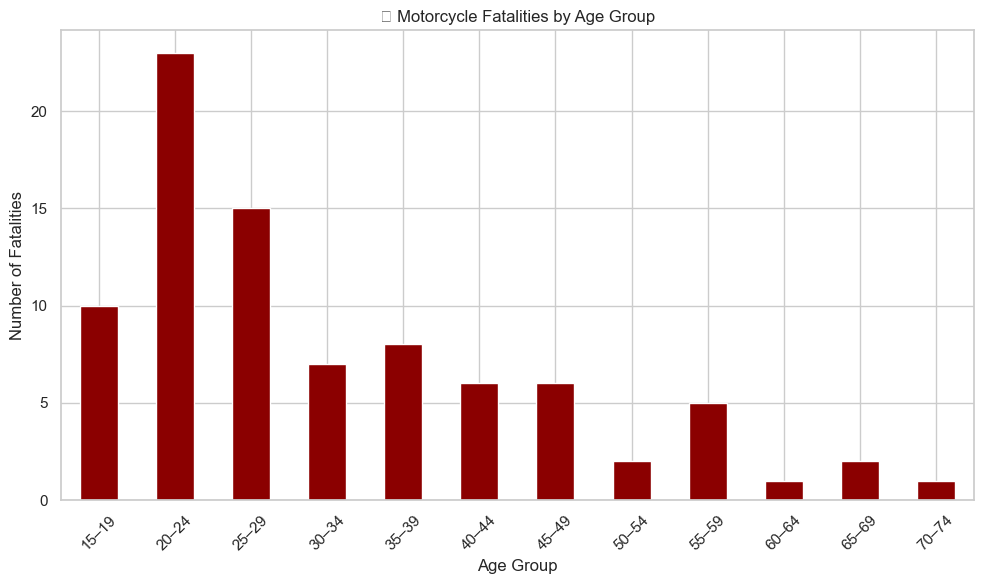

C:\Users\gilad\AppData\Local\Temp\ipykernel_540\114371420.py:41: UserWarning: Glyph 129658 (\N{STETHOSCOPE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129658 (\N{STETHOSCOPE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


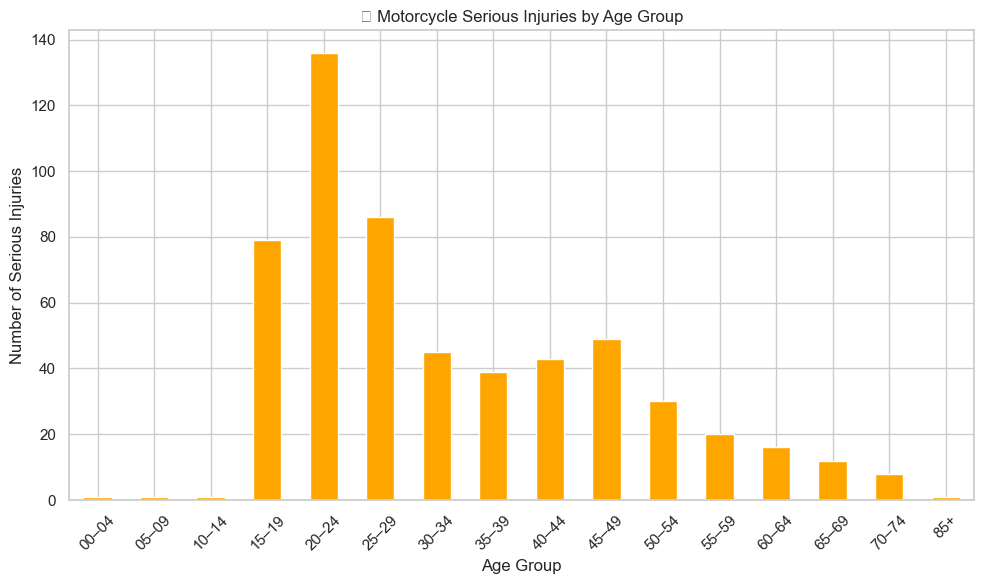

In [80]:
import matplotlib.pyplot as plt

# Define age mapping
age_map = {
    1: "00–04", 2: "05–09", 3: "10–14", 4: "15–19", 5: "20–24",
    6: "25–29", 7: "30–34", 8: "35–39", 9: "40–44", 10: "45–49",
    11: "50–54", 12: "55–59", 13: "60–64", 14: "65–69", 15: "70–74",
    16: "75–79", 17: "80–84", 18: "85+", 99: "Unknown"
}

# Filter motorcycle crashes
motorcycle_df = df2[df2["SUG_REHEV_NASA_LMS"].isin([8, 9, 10, 19])]

# Fatalities (HUMRAT_PGIA == 1)
fatal_motorcycle = motorcycle_df[motorcycle_df["HUMRAT_PGIA"] == 1]
fatal_by_age = fatal_motorcycle["KVUZA_GIL"].value_counts().sort_index()
fatal_by_age.index = fatal_by_age.index.map(age_map)

# Serious injuries (HUMRAT_PGIA == 2)
serious_motorcycle = motorcycle_df[motorcycle_df["HUMRAT_PGIA"] == 2]
serious_by_age = serious_motorcycle["KVUZA_GIL"].value_counts().sort_index()
serious_by_age.index = serious_by_age.index.map(age_map)

# Plot fatalities
plt.figure(figsize=(10, 6))
fatal_by_age.plot(kind="bar", color="darkred")
plt.title("🛵 Motorcycle Fatalities by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Fatalities")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot serious injuries
plt.figure(figsize=(10, 6))
serious_by_age.plot(kind="bar", color="orange")
plt.title("🩺 Motorcycle Serious Injuries by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Serious Injuries")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\gilad\AppData\Local\Temp\ipykernel_540\3593872089.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  motorcycle_df["crash_type"] = motorcycle_df.apply(classify_crash, axis=1)
C:\Users\gilad\AppData\Local\Temp\ipykernel_540\3593872089.py:41: UserWarning: Glyph 128757 (\N{MOTOR SCOOTER}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128757 (\N{MOTOR SCOOTER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


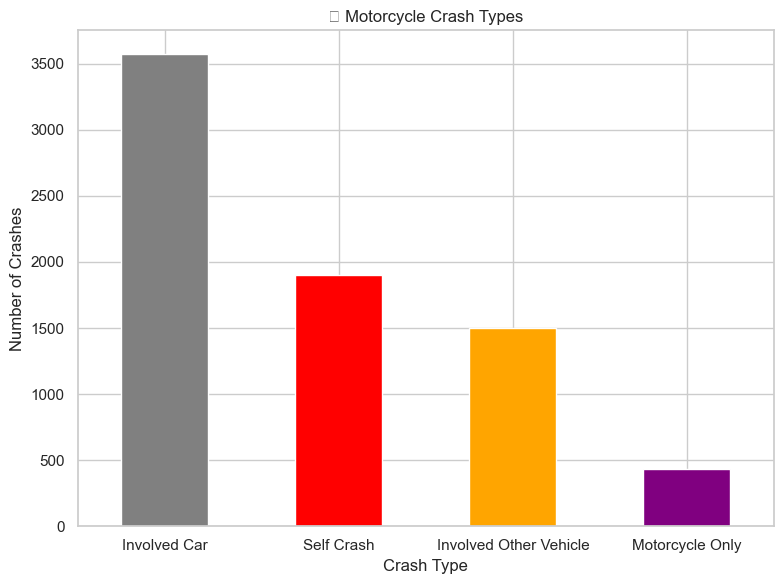

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Rename first column for clarity
df2 = df2.rename(columns={df2.columns[0]: "ACCIDENT_ID"})

# Filter motorcycle crashes
motorcycle_df = df2[df2["SUG_REHEV_NASA_LMS"].isin([8, 9, 10, 19])]

# Create a helper DataFrame with all crashes grouped by accident ID
accident_groups = df2.groupby("ACCIDENT_ID")

# Function to classify crash type
def classify_crash(row):
    group = accident_groups.get_group(row["ACCIDENT_ID"])
    if len(group) == 1:
        return "Self Crash"
    else:
        other_vehicles = group["SUG_REHEV_NASA_LMS"].unique()
        others = [v for v in other_vehicles if v not in [8, 9, 10, 19]]
        if not others:
            return "Motorcycle Only"
        elif 1 in others:
            return "Involved Car"
        else:
            return "Involved Other Vehicle"

# Apply classification
motorcycle_df["crash_type"] = motorcycle_df.apply(classify_crash, axis=1)

# Count crash types
crash_counts = motorcycle_df["crash_type"].value_counts()

# Plot
plt.figure(figsize=(8, 6))
crash_counts.plot(kind="bar", color=["gray", "red", "orange", "purple"])
plt.title("🛵 Motorcycle Crash Types")
plt.xlabel("Crash Type")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# so it appears that

C:\Users\gilad\AppData\Local\Temp\ipykernel_540\3468049686.py:24: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


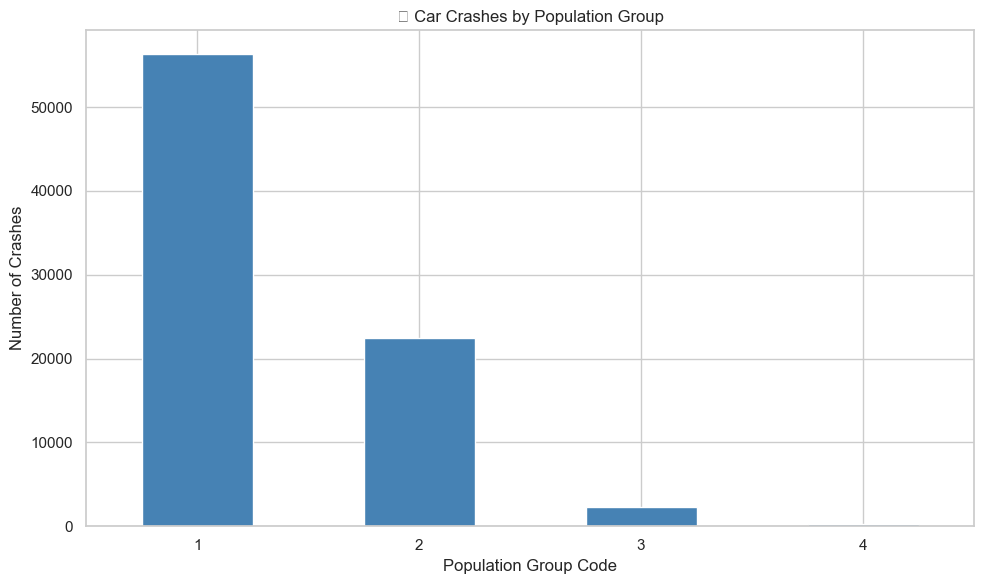

C:\Users\gilad\AppData\Local\Temp\ipykernel_540\3468049686.py:34: UserWarning: Glyph 127949 (\N{RACING MOTORCYCLE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Temp\ipykernel_540\3468049686.py:34: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127949 (\N{RACING MOTORCYCLE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


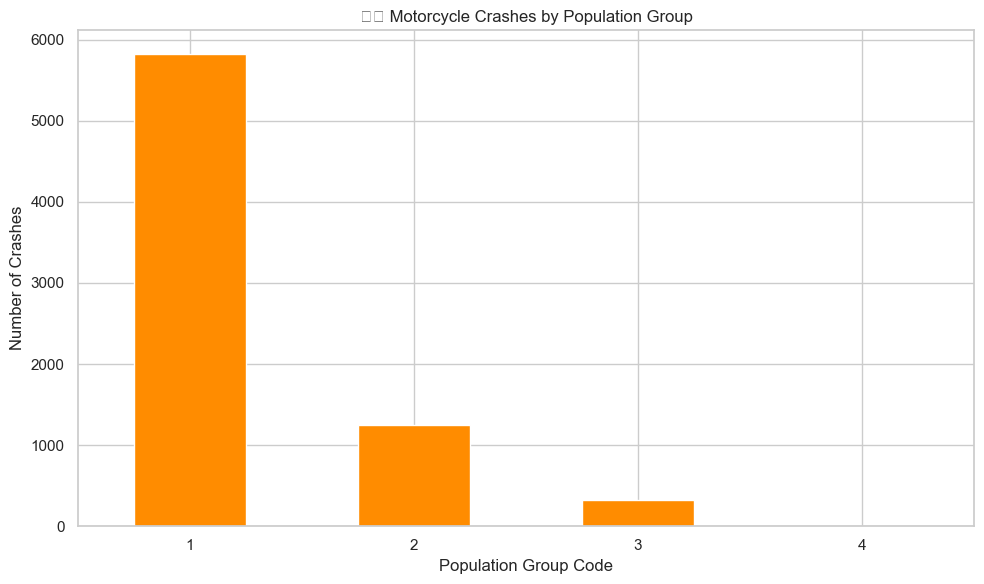

🧪 Chi-Square Test Results:
Chi-square statistic: 457.61
p-value: 0.0000
Degrees of freedom: 3


In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define vehicle type codes
car_codes = [1]
motorcycle_codes = [8, 9, 10, 19]

# Filter car and motorcycle crashes
car_df = df2[df2["SUG_REHEV_NASA_LMS"].isin(car_codes)]
motorcycle_df = df2[df2["SUG_REHEV_NASA_LMS"].isin(motorcycle_codes)]

# Count crashes by population group
car_counts = car_df["KVUTZAT_OHLUSIYA_LMS"].value_counts().sort_index()
motorcycle_counts = motorcycle_df["KVUTZAT_OHLUSIYA_LMS"].value_counts().sort_index()

# Plot car crashes
plt.figure(figsize=(10, 6))
car_counts.plot(kind="bar", color="steelblue")
plt.title("🚗 Car Crashes by Population Group")
plt.xlabel("Population Group Code")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Plot motorcycle crashes
plt.figure(figsize=(10, 6))
motorcycle_counts.plot(kind="bar", color="darkorange")
plt.title("🏍️ Motorcycle Crashes by Population Group")
plt.xlabel("Population Group Code")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Align indices for chi-square test
all_groups = sorted(set(car_counts.index).union(set(motorcycle_counts.index)))
car_aligned = car_counts.reindex(all_groups, fill_value=0)
motorcycle_aligned = motorcycle_counts.reindex(all_groups, fill_value=0)

# Create contingency table
contingency = pd.DataFrame({
    "Car": car_aligned,
    "Motorcycle": motorcycle_aligned
})

# Run chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency.T)

# Print results
print("🧪 Chi-Square Test Results:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of freedom: {dof}")

C:\Users\gilad\AppData\Local\Temp\ipykernel_540\2654317403.py:24: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


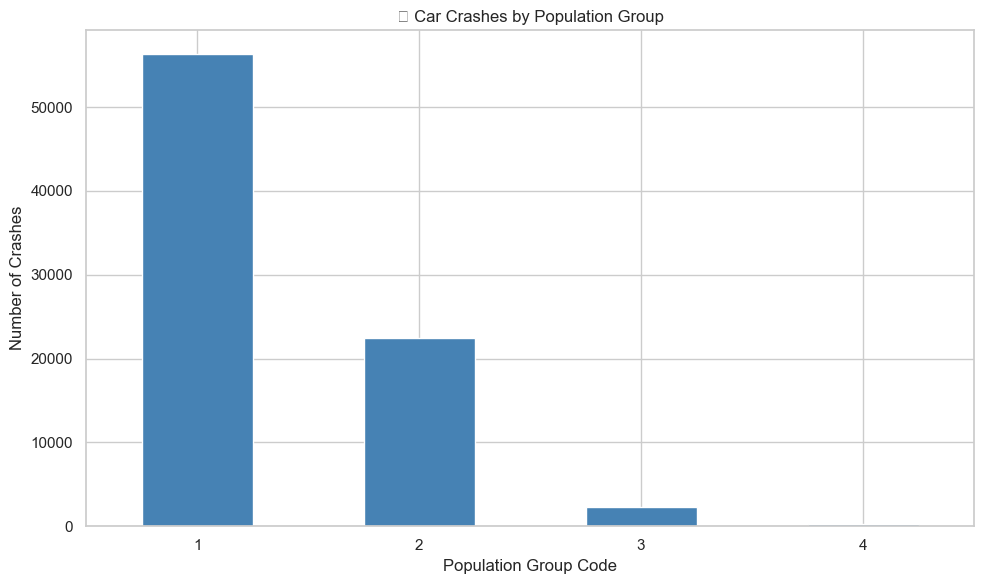

C:\Users\gilad\AppData\Local\Temp\ipykernel_540\2654317403.py:34: UserWarning: Glyph 127949 (\N{RACING MOTORCYCLE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Temp\ipykernel_540\2654317403.py:34: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127949 (\N{RACING MOTORCYCLE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


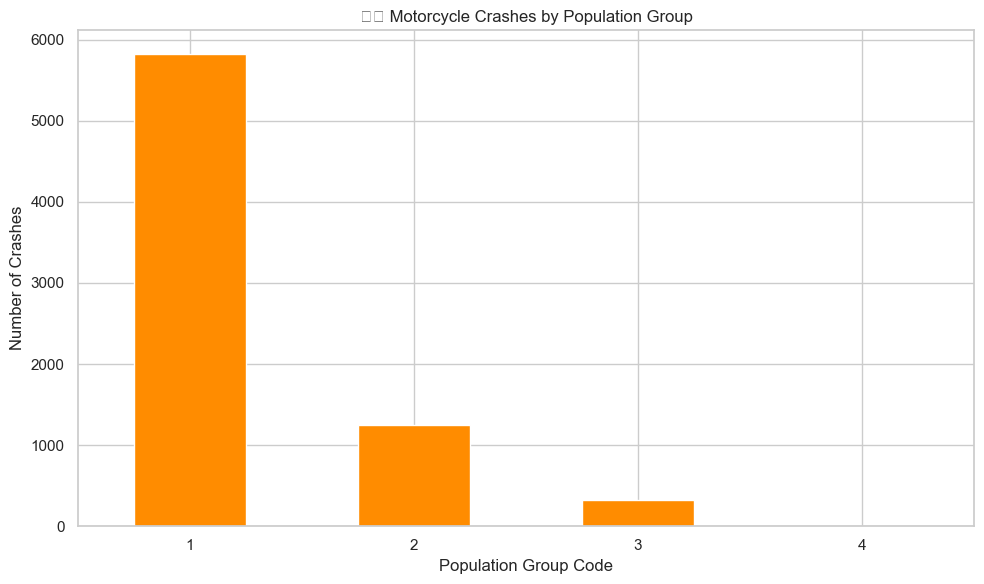

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1.4901161193847656e-08, but the percent differences are:
0.0036395489426801885

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define vehicle type codes
car_codes = [1]
motorcycle_codes = [8, 9, 10, 19]

# Filter car and motorcycle crashes
car_df = df2[df2["SUG_REHEV_NASA_LMS"].isin(car_codes)]
motorcycle_df = df2[df2["SUG_REHEV_NASA_LMS"].isin(motorcycle_codes)]

# Count crashes by population group
car_counts = car_df["KVUTZAT_OHLUSIYA_LMS"].value_counts().sort_index()
motorcycle_counts = motorcycle_df["KVUTZAT_OHLUSIYA_LMS"].value_counts().sort_index()

# Plot car crashes
plt.figure(figsize=(10, 6))
car_counts.plot(kind="bar", color="steelblue")
plt.title("🚗 Car Crashes by Population Group")
plt.xlabel("Population Group Code")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Plot motorcycle crashes
plt.figure(figsize=(10, 6))
motorcycle_counts.plot(kind="bar", color="darkorange")
plt.title("🏍️ Motorcycle Crashes by Population Group")
plt.xlabel("Population Group Code")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Define population proportions (aligned with group codes)
# Assuming group codes are 1, 2, 3
population_proportions = pd.Series({
    1: 0.731,
    2: 0.211,
    3: 0.057
})

# Align indices for chi-square test
all_groups = sorted(set(car_counts.index).union(set(motorcycle_counts.index)))
car_aligned = car_counts.reindex(all_groups, fill_value=0)
motorcycle_aligned = motorcycle_counts.reindex(all_groups, fill_value=0)

# Adjust expected counts based on population proportions
total_car = car_aligned.sum()
total_motorcycle = motorcycle_aligned.sum()

# Normalize expected counts to match observed totals
expected_car_raw = population_proportions.reindex(all_groups, fill_value=0)
expected_car = expected_car_raw / expected_car_raw.sum() * total_car

expected_motorcycle_raw = population_proportions.reindex(all_groups, fill_value=0)
expected_motorcycle = expected_motorcycle_raw / expected_motorcycle_raw.sum() * total_motorcycle

# Chi-square test for car crashes
chi2_car, p_car = stats.chisquare(f_obs=car_aligned, f_exp=expected_car)

# Chi-square test for motorcycle crashes
chi2_motorcycle, p_motorcycle = stats.chisquare(f_obs=motorcycle_aligned, f_exp=expected_motorcycle)

# Print results
print("🧪 Chi-Square Test Results (Adjusted for Population Proportions):")
print(f"🚗 Car Crashes — Chi-square: {chi2_car:.2f}, p-value: {p_car:.4f}")
print(f"🏍️ Motorcycle Crashes — Chi-square: {chi2_motorcycle:.2f}, p-value: {p_motorcycle:.4f}")

C:\Users\gilad\AppData\Local\Temp\ipykernel_540\2589316257.py:24: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


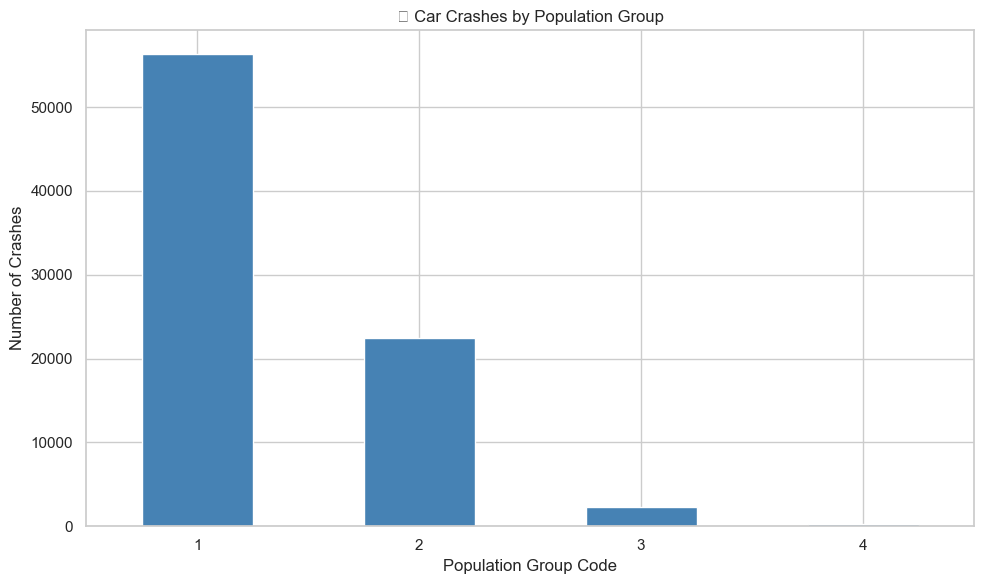

C:\Users\gilad\AppData\Local\Temp\ipykernel_540\2589316257.py:34: UserWarning: Glyph 127949 (\N{RACING MOTORCYCLE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Temp\ipykernel_540\2589316257.py:34: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127949 (\N{RACING MOTORCYCLE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


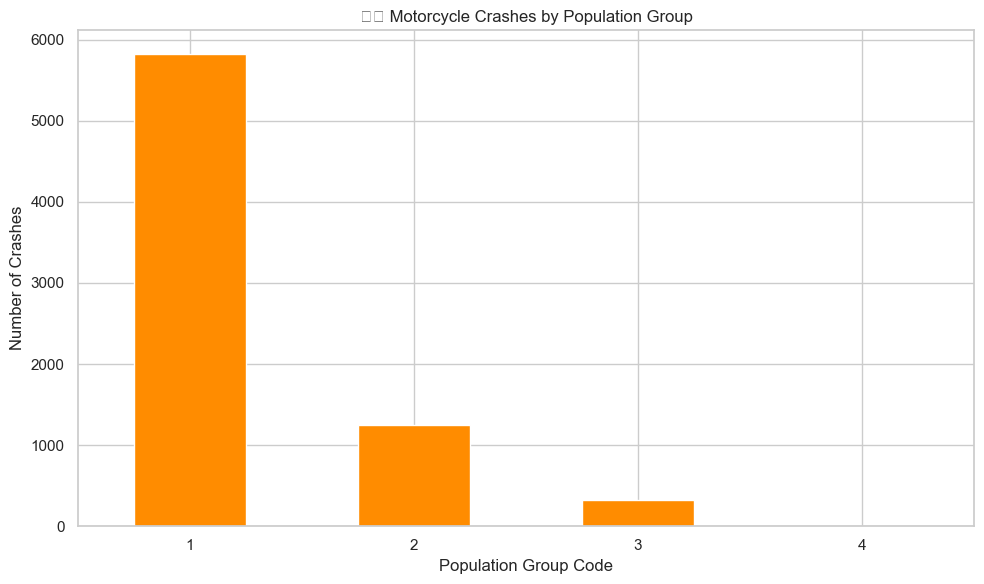

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1.4901161193847656e-08, but the percent differences are:
0.0036395489426801885

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define vehicle type codes
car_codes = [1]
motorcycle_codes = [8, 9, 10, 19]

# Filter car and motorcycle crashes
car_df = df2[df2["SUG_REHEV_NASA_LMS"].isin(car_codes)]
motorcycle_df = df2[df2["SUG_REHEV_NASA_LMS"].isin(motorcycle_codes)]

# Count crashes by population group
car_counts = car_df["KVUTZAT_OHLUSIYA_LMS"].value_counts().sort_index()
motorcycle_counts = motorcycle_df["KVUTZAT_OHLUSIYA_LMS"].value_counts().sort_index()

# Plot car crashes
plt.figure(figsize=(10, 6))
car_counts.plot(kind="bar", color="steelblue")
plt.title("🚗 Car Crashes by Population Group")
plt.xlabel("Population Group Code")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Plot motorcycle crashes
plt.figure(figsize=(10, 6))
motorcycle_counts.plot(kind="bar", color="darkorange")
plt.title("🏍️ Motorcycle Crashes by Population Group")
plt.xlabel("Population Group Code")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Define population proportions (aligned with group codes)
population_proportions = pd.Series({
    1: 0.731,
    2: 0.211,
    3: 0.057
})

# Align indices
all_groups = sorted(set(car_counts.index).union(set(motorcycle_counts.index)))
car_aligned = car_counts.reindex(all_groups, fill_value=0)
motorcycle_aligned = motorcycle_counts.reindex(all_groups, fill_value=0)

# Normalize expected counts to match observed totals
expected_car_raw = population_proportions.reindex(all_groups, fill_value=0)
expected_car = expected_car_raw / expected_car_raw.sum() * car_aligned.sum()

expected_motorcycle_raw = population_proportions.reindex(all_groups, fill_value=0)
expected_motorcycle = expected_motorcycle_raw / expected_motorcycle_raw.sum() * motorcycle_aligned.sum()

# Filter out zero expected values
valid_car = expected_car > 0
valid_motorcycle = expected_motorcycle > 0

car_obs = car_aligned[valid_car]
car_exp = expected_car[valid_car]

motorcycle_obs = motorcycle_aligned[valid_motorcycle]
motorcycle_exp = expected_motorcycle[valid_motorcycle]

# Chi-square tests
chi2_car, p_car = stats.chisquare(f_obs=car_obs, f_exp=car_exp)
chi2_motorcycle, p_motorcycle = stats.chisquare(f_obs=motorcycle_obs, f_exp=motorcycle_exp)

# Print results
print("🧪 Chi-Square Test Results (Adjusted for Population Proportions):")
print(f"🚗 Car Crashes — Chi-square: {chi2_car:.2f}, p-value: {p_car:.4f}")
print(f"🏍️ Motorcycle Crashes — Chi-square: {chi2_motorcycle:.2f}, p-value: {p_motorcycle:.4f}")

# Evaluate Group 2 risk
group_2_ratio_car = car_obs.get(2, 0) / car_exp.get(2, 1)
group_2_ratio_motorcycle = motorcycle_obs.get(2, 0) / motorcycle_exp.get(2, 1)

print("\n📊 Group 2 Risk Analysis:")
print(f"Group 2 Car Crash Ratio (Observed/Expected): {group_2_ratio_car:.2f}×")
print(f"Group 2 Motorcycle Crash Ratio (Observed/Expected): {group_2_ratio_motorcycle:.2f}×")

if group_2_ratio_motorcycle > group_2_ratio_car:
    print(f"👉 Group 2 is disproportionately more involved in motorcycle crashes — about {group_2_ratio_motorcycle:.2f}× the expected rate.")
else:
    print(f"👉 Group 2 is not more disproportionately involved in motorcycle crashes than car crashes.")

C:\Users\gilad\AppData\Local\Temp\ipykernel_540\2207669006.py:24: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


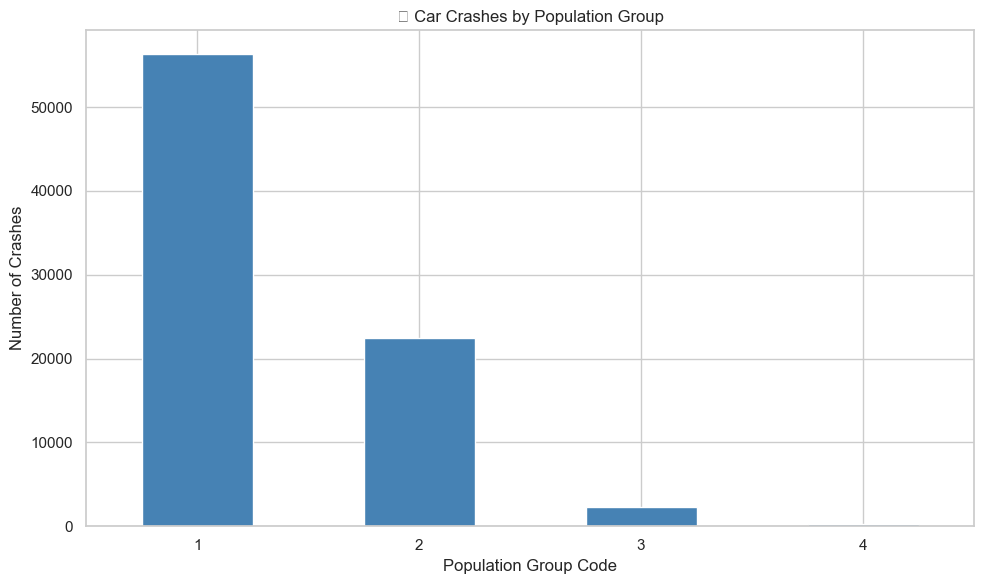

C:\Users\gilad\AppData\Local\Temp\ipykernel_540\2207669006.py:34: UserWarning: Glyph 127949 (\N{RACING MOTORCYCLE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Temp\ipykernel_540\2207669006.py:34: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127949 (\N{RACING MOTORCYCLE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


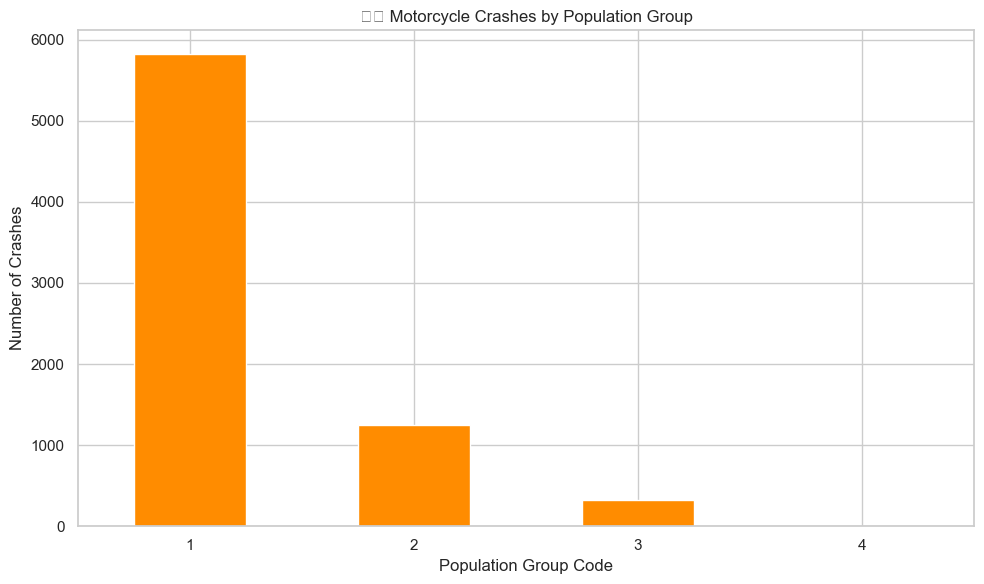

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1.4901161193847656e-08, but the percent differences are:
0.0036395489426801885

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define vehicle type codes
car_codes = [1]
motorcycle_codes = [8, 9, 10, 19]

# Filter car and motorcycle crashes
car_df = df2[df2["SUG_REHEV_NASA_LMS"].isin(car_codes)]
motorcycle_df = df2[df2["SUG_REHEV_NASA_LMS"].isin(motorcycle_codes)]

# Count crashes by population group
car_counts = car_df["KVUTZAT_OHLUSIYA_LMS"].value_counts().sort_index()
motorcycle_counts = motorcycle_df["KVUTZAT_OHLUSIYA_LMS"].value_counts().sort_index()

# Plot car crashes
plt.figure(figsize=(10, 6))
car_counts.plot(kind="bar", color="steelblue")
plt.title("🚗 Car Crashes by Population Group")
plt.xlabel("Population Group Code")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Plot motorcycle crashes
plt.figure(figsize=(10, 6))
motorcycle_counts.plot(kind="bar", color="darkorange")
plt.title("🏍️ Motorcycle Crashes by Population Group")
plt.xlabel("Population Group Code")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Define population proportions
population_proportions = pd.Series({
    1: 0.73,
    2: 0.21,
    3: 0.06
})

# Align indices
all_groups = sorted(set(car_counts.index).union(set(motorcycle_counts.index)))
car_aligned = car_counts.reindex(all_groups, fill_value=0)
motorcycle_aligned = motorcycle_counts.reindex(all_groups, fill_value=0)

# Normalize expected counts to match observed totals exactly
expected_car_raw = population_proportions.reindex(all_groups, fill_value=0)
expected_car = expected_car_raw / expected_car_raw.sum() * car_aligned.sum()
expected_car = expected_car * (car_aligned.sum() / expected_car.sum())  # force exact match

expected_motorcycle_raw = population_proportions.reindex(all_groups, fill_value=0)
expected_motorcycle = expected_motorcycle_raw / expected_motorcycle_raw.sum() * motorcycle_aligned.sum()
expected_motorcycle = expected_motorcycle * (motorcycle_aligned.sum() / expected_motorcycle.sum())  # force exact match

# Filter out zero expected values
valid_car = expected_car > 0
valid_motorcycle = expected_motorcycle > 0

car_obs = car_aligned[valid_car]
car_exp = expected_car[valid_car]

motorcycle_obs = motorcycle_aligned[valid_motorcycle]
motorcycle_exp = expected_motorcycle[valid_motorcycle]

# Chi-square tests
chi2_car, p_car = stats.chisquare(f_obs=car_obs.values, f_exp=car_exp.values)
chi2_motorcycle, p_motorcycle = stats.chisquare(f_obs=motorcycle_obs.values, f_exp=motorcycle_exp.values)

# Print results
print("🧪 Chi-Square Test Results (Adjusted for Population Proportions):")
print(f"🚗 Car Crashes — Chi-square: {chi2_car:.2f}, p-value: {p_car:.4f}")
print(f"🏍️ Motorcycle Crashes — Chi-square: {chi2_motorcycle:.2f}, p-value: {p_motorcycle:.4f}")

# Evaluate Group 2 risk
group_2_ratio_car = car_obs.get(2, 0) / car_exp.get(2, 1)
group_2_ratio_motorcycle = motorcycle_obs.get(2, 0) / motorcycle_exp.get(2, 1)

print("\n📊 Group 2 Risk Analysis:")
print(f"Group 2 Car Crash Ratio (Observed/Expected): {group_2_ratio_car:.2f}×")
print(f"Group 2 Motorcycle Crash Ratio (Observed/Expected): {group_2_ratio_motorcycle:.2f}×")

if group_2_ratio_motorcycle > group_2_ratio_car:
    print(f"👉 Group 2 is disproportionately more involved in motorcycle crashes — about {group_2_ratio_motorcycle:.2f}× the expected rate.")
else:
    print(f"👉 Group 2 is not more disproportionately involved in motorcycle crashes than car crashes.")

C:\Users\gilad\AppData\Local\Temp\ipykernel_540\1436759049.py:24: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


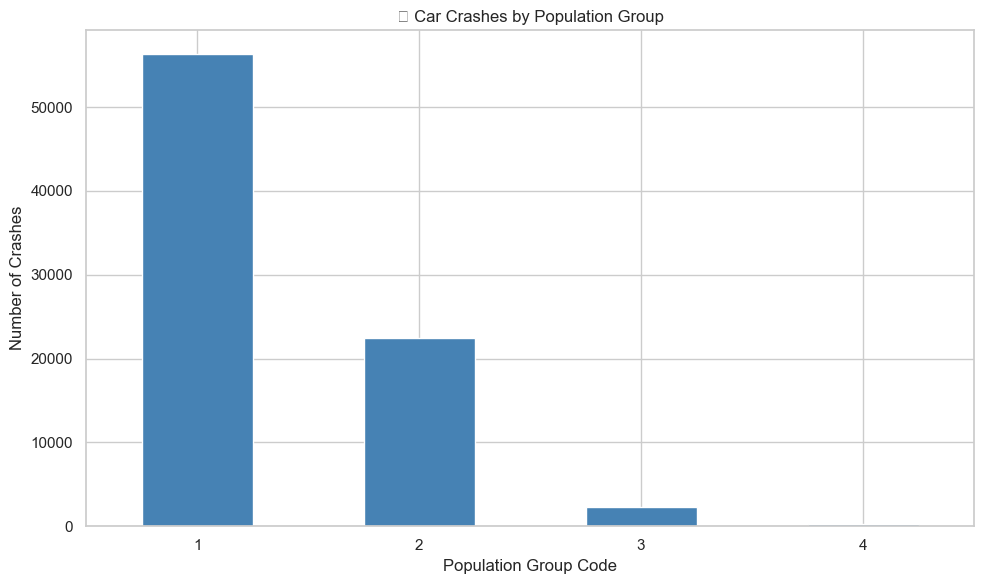

C:\Users\gilad\AppData\Local\Temp\ipykernel_540\1436759049.py:34: UserWarning: Glyph 127949 (\N{RACING MOTORCYCLE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Temp\ipykernel_540\1436759049.py:34: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127949 (\N{RACING MOTORCYCLE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


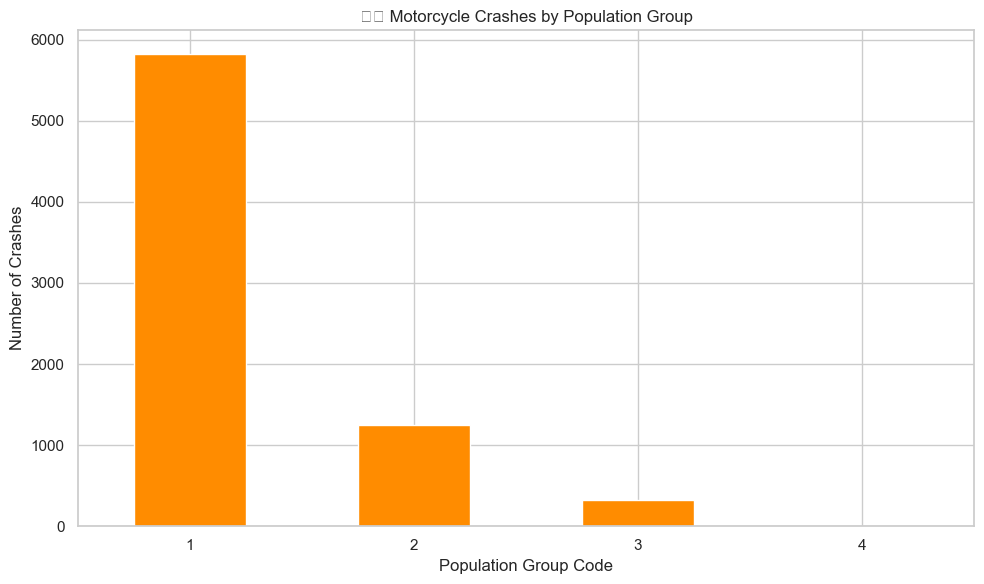

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1.4901161193847656e-08, but the percent differences are:
0.0036395489426801885

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define vehicle type codes
car_codes = [1]
motorcycle_codes = [8, 9, 10, 19]

# Filter car and motorcycle crashes
car_df = df2[df2["SUG_REHEV_NASA_LMS"].isin(car_codes)]
motorcycle_df = df2[df2["SUG_REHEV_NASA_LMS"].isin(motorcycle_codes)]

# Count crashes by population group
car_counts = car_df["KVUTZAT_OHLUSIYA_LMS"].value_counts().sort_index()
motorcycle_counts = motorcycle_df["KVUTZAT_OHLUSIYA_LMS"].value_counts().sort_index()

# Plot car crashes
plt.figure(figsize=(10, 6))
car_counts.plot(kind="bar", color="steelblue")
plt.title("🚗 Car Crashes by Population Group")
plt.xlabel("Population Group Code")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Plot motorcycle crashes
plt.figure(figsize=(10, 6))
motorcycle_counts.plot(kind="bar", color="darkorange")
plt.title("🏍️ Motorcycle Crashes by Population Group")
plt.xlabel("Population Group Code")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Define population proportions
population_proportions = pd.Series({
    1: 0.731,
    2: 0.211,
    3: 0.058
})

# Align indices
all_groups = sorted(set(car_counts.index).union(set(motorcycle_counts.index)))
car_aligned = car_counts.reindex(all_groups, fill_value=0)
motorcycle_aligned = motorcycle_counts.reindex(all_groups, fill_value=0)

# Function to scale expected values to match observed total exactly
def scale_expected(expected_raw, observed_total):
    scaled = expected_raw / expected_raw.sum() * observed_total
    correction = observed_total - scaled.sum()
    scaled.iloc[0] += correction  # apply tiny correction to first element
    return scaled

# Compute expected values
expected_car_raw = population_proportions.reindex(all_groups, fill_value=0)
expected_car = scale_expected(expected_car_raw, car_aligned.sum())

expected_motorcycle_raw = population_proportions.reindex(all_groups, fill_value=0)
expected_motorcycle = scale_expected(expected_motorcycle_raw, motorcycle_aligned.sum())

# Filter out zero expected values
valid_car = expected_car > 0
valid_motorcycle = expected_motorcycle > 0

car_obs = car_aligned[valid_car]
car_exp = expected_car[valid_car]

motorcycle_obs = motorcycle_aligned[valid_motorcycle]
motorcycle_exp = expected_motorcycle[valid_motorcycle]

# Chi-square tests
chi2_car, p_car = stats.chisquare(f_obs=car_obs.values, f_exp=car_exp.values)
chi2_motorcycle, p_motorcycle = stats.chisquare(f_obs=motorcycle_obs.values, f_exp=motorcycle_exp.values)

# Print results
print("🧪 Chi-Square Test Results (Adjusted for Population Proportions):")
print(f"🚗 Car Crashes — Chi-square: {chi2_car:.2f}, p-value: {p_car:.4f}")
print(f"🏍️ Motorcycle Crashes — Chi-square: {chi2_motorcycle:.2f}, p-value: {p_motorcycle:.4f}")

# Evaluate Group 2 risk
group_2_ratio_car = car_obs.get(2, 0) / car_exp.get(2, 1)
group_2_ratio_motorcycle = motorcycle_obs.get(2, 0) / motorcycle_exp.get(2, 1)

print("\n📊 Group 2 Risk Analysis:")
print(f"Group 2 Car Crash Ratio (Observed/Expected): {group_2_ratio_car:.2f}×")
print(f"Group 2 Motorcycle Crash Ratio (Observed/Expected): {group_2_ratio_motorcycle:.2f}×")

if group_2_ratio_motorcycle > group_2_ratio_car:
    print(f"👉 Group 2 is disproportionately more involved in motorcycle crashes — about {group_2_ratio_motorcycle:.2f}× the expected rate.")
else:
    print(f"👉 Group 2 is not more disproportionately involved in motorcycle crashes than car crashes.")

C:\Users\gilad\AppData\Local\Temp\ipykernel_540\1346984328.py:29: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


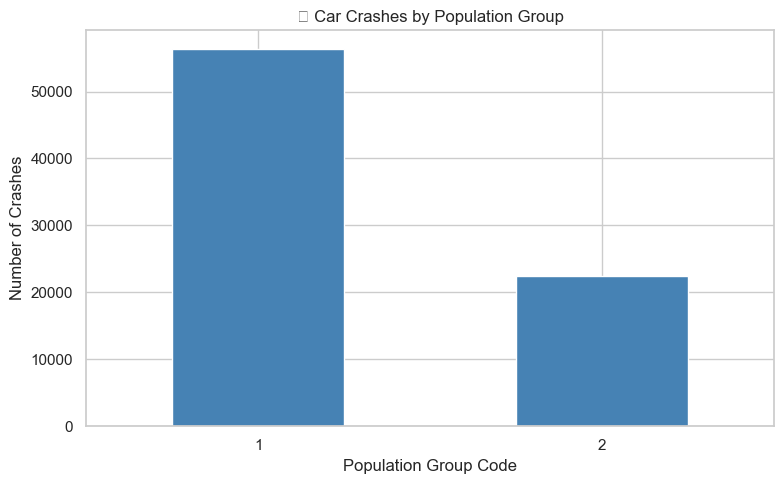

C:\Users\gilad\AppData\Local\Temp\ipykernel_540\1346984328.py:39: UserWarning: Glyph 127949 (\N{RACING MOTORCYCLE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Temp\ipykernel_540\1346984328.py:39: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127949 (\N{RACING MOTORCYCLE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


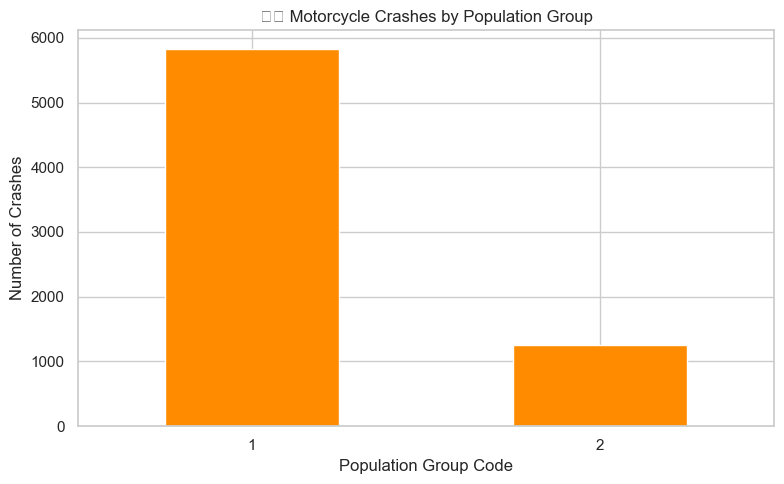

🧪 Chi-Square Test Results (Adjusted for 75/25 Population Proportions):
🚗 Car Crashes — Chi-square: 520.02, p-value: 0.0000
🏍️ Motorcycle Crashes — Chi-square: 203.14, p-value: 0.0000

📊 Group 2 Risk Analysis:
Group 2 Car Crash Ratio (Observed/Expected): 1.14×
Group 2 Motorcycle Crash Ratio (Observed/Expected): 0.71×
👉 Group 2 is not more disproportionately involved in motorcycle crashes than car crashes.


In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define vehicle type codes
car_codes = [1]
motorcycle_codes = [8, 9, 10, 19]

# Filter car and motorcycle crashes
car_df = df2[df2["SUG_REHEV_NASA_LMS"].isin(car_codes)]
motorcycle_df = df2[df2["SUG_REHEV_NASA_LMS"].isin(motorcycle_codes)]

# Keep only Group 1 and Group 2
valid_groups = [1, 2]
car_df = car_df[car_df["KVUTZAT_OHLUSIYA_LMS"].isin(valid_groups)]
motorcycle_df = motorcycle_df[motorcycle_df["KVUTZAT_OHLUSIYA_LMS"].isin(valid_groups)]

# Count crashes by population group
car_counts = car_df["KVUTZAT_OHLUSIYA_LMS"].value_counts().sort_index()
motorcycle_counts = motorcycle_df["KVUTZAT_OHLUSIYA_LMS"].value_counts().sort_index()

# Plot car crashes
plt.figure(figsize=(8, 5))
car_counts.plot(kind="bar", color="steelblue")
plt.title("🚗 Car Crashes by Population Group")
plt.xlabel("Population Group Code")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Plot motorcycle crashes
plt.figure(figsize=(8, 5))
motorcycle_counts.plot(kind="bar", color="darkorange")
plt.title("🏍️ Motorcycle Crashes by Population Group")
plt.xlabel("Population Group Code")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Define simplified population proportions
population_proportions = pd.Series({
    1: 0.75,
    2: 0.25
})

# Align indices
car_aligned = car_counts.reindex(valid_groups, fill_value=0)
motorcycle_aligned = motorcycle_counts.reindex(valid_groups, fill_value=0)

# Scale expected values to match observed totals
def scale_expected(expected_raw, observed_total):
    scaled = expected_raw / expected_raw.sum() * observed_total
    correction = observed_total - scaled.sum()
    scaled.iloc[0] += correction
    return scaled

expected_car = scale_expected(population_proportions, car_aligned.sum())
expected_motorcycle = scale_expected(population_proportions, motorcycle_aligned.sum())

# Chi-square tests
chi2_car, p_car = stats.chisquare(f_obs=car_aligned.values, f_exp=expected_car.values)
chi2_motorcycle, p_motorcycle = stats.chisquare(f_obs=motorcycle_aligned.values, f_exp=expected_motorcycle.values)

# Print results
print("🧪 Chi-Square Test Results (Adjusted for 75/25 Population Proportions):")
print(f"🚗 Car Crashes — Chi-square: {chi2_car:.2f}, p-value: {p_car:.4f}")
print(f"🏍️ Motorcycle Crashes — Chi-square: {chi2_motorcycle:.2f}, p-value: {p_motorcycle:.4f}")

# Evaluate Group 2 risk
group_2_ratio_car = car_aligned.get(2, 0) / expected_car.get(2, 1)
group_2_ratio_motorcycle = motorcycle_aligned.get(2, 0) / expected_motorcycle.get(2, 1)

print("\n📊 Group 2 Risk Analysis:")
print(f"Group 2 Car Crash Ratio (Observed/Expected): {group_2_ratio_car:.2f}×")
print(f"Group 2 Motorcycle Crash Ratio (Observed/Expected): {group_2_ratio_motorcycle:.2f}×")

if group_2_ratio_motorcycle > group_2_ratio_car:
    print(f"👉 Group 2 is disproportionately more involved in motorcycle crashes — about {group_2_ratio_motorcycle:.2f}× the expected rate.")
else:
    print(f"👉 Group 2 is not more disproportionately involved in motorcycle crashes than car crashes.")

C:\Users\gilad\AppData\Local\Temp\ipykernel_540\2722863498.py:30: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


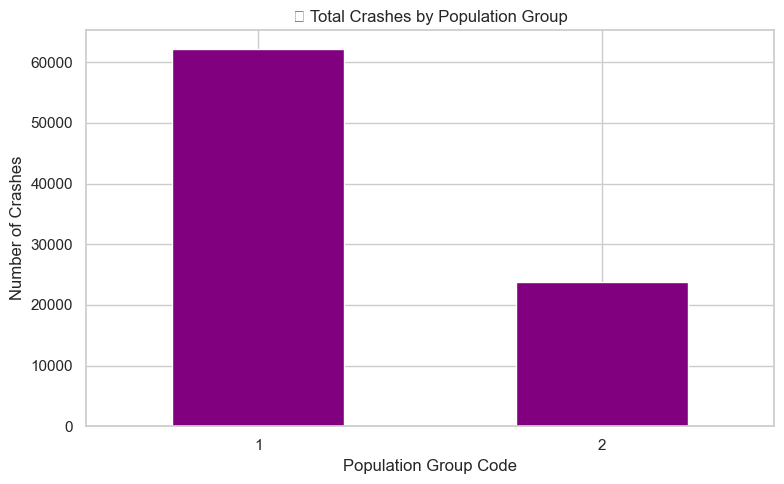

🧪 Chi-Square Test Results (Combined Crashes):
Total Chi-square: 315.22, p-value: 0.0000

📊 Group 2 Risk Analysis:
Group 2 Crash Ratio (Observed/Expected): 1.10×
👉 Group 2 is statistically more involved in crashes — about 1.10× the expected rate.


In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define vehicle type codes
car_codes = [1]
motorcycle_codes = [8, 9, 10, 19]

# Filter car and motorcycle crashes
car_df = df2[df2["SUG_REHEV_NASA_LMS"].isin(car_codes)]
motorcycle_df = df2[df2["SUG_REHEV_NASA_LMS"].isin(motorcycle_codes)]

# Combine both datasets
combined_df = pd.concat([car_df, motorcycle_df])

# Keep only Group 1 and Group 2
valid_groups = [1, 2]
combined_df = combined_df[combined_df["KVUTZAT_OHLUSIYA_LMS"].isin(valid_groups)]

# Count total crashes by population group
combined_counts = combined_df["KVUTZAT_OHLUSIYA_LMS"].value_counts().sort_index()

# Plot combined crashes
plt.figure(figsize=(8, 5))
combined_counts.plot(kind="bar", color="purple")
plt.title("🚨 Total Crashes by Population Group")
plt.xlabel("Population Group Code")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Define population proportions
population_proportions = pd.Series({
    1: 0.75,
    2: 0.25
})

# Align indices
combined_aligned = combined_counts.reindex(valid_groups, fill_value=0)

# Scale expected values to match observed total
def scale_expected(expected_raw, observed_total):
    scaled = expected_raw / expected_raw.sum() * observed_total
    correction = observed_total - scaled.sum()
    scaled.iloc[0] += correction
    return scaled

expected_combined = scale_expected(population_proportions, combined_aligned.sum())

# Chi-square test
chi2_combined, p_combined = stats.chisquare(f_obs=combined_aligned.values, f_exp=expected_combined.values)

# Print results
print("🧪 Chi-Square Test Results (Combined Crashes):")
print(f"Total Chi-square: {chi2_combined:.2f}, p-value: {p_combined:.4f}")

# Evaluate Group 2 risk
group_2_ratio = combined_aligned.get(2, 0) / expected_combined.get(2, 1)

print("\n📊 Group 2 Risk Analysis:")
print(f"Group 2 Crash Ratio (Observed/Expected): {group_2_ratio:.2f}×")

if p_combined < 0.05:
    print(f"👉 Group 2 is statistically more involved in crashes — about {group_2_ratio:.2f}× the expected rate.")
else:
    print(f"👉 No statistically significant difference in crash involvement for Group 2.")

C:\Users\gilad\AppData\Local\Temp\ipykernel_540\751850707.py:34: UserWarning: Glyph 9760 (\N{SKULL AND CROSSBONES}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Temp\ipykernel_540\751850707.py:34: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9760 (\N{SKULL AND CROSSBONES}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


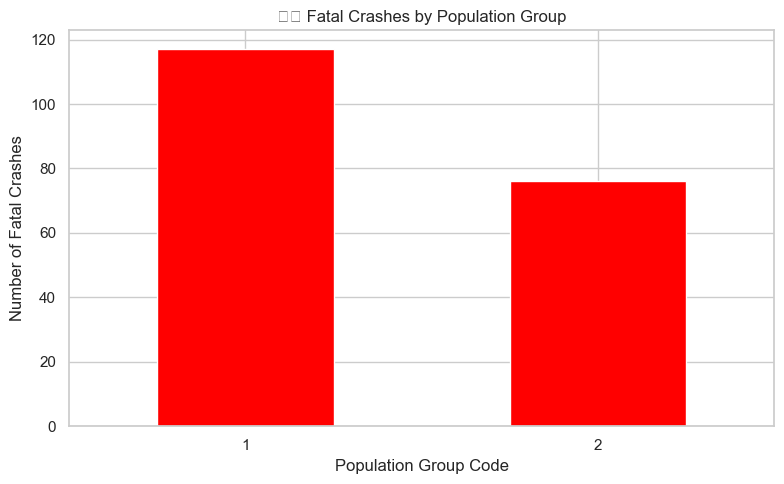

🧪 Chi-Square Test Results (Fatal Crashes):
Total Chi-square: 21.28, p-value: 0.0000

📊 Group 2 Fatal Crash Risk Analysis:
Group 2 Fatal Crash Ratio (Observed/Expected): 1.58×
👉 Group 2 is statistically more involved in fatal crashes — about 1.58× the expected rate.


In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define vehicle type codes
car_codes = [1]
motorcycle_codes = [8, 9, 10, 19]

# Filter car and motorcycle crashes
car_df = df2[df2["SUG_REHEV_NASA_LMS"].isin(car_codes)]
motorcycle_df = df2[df2["SUG_REHEV_NASA_LMS"].isin(motorcycle_codes)]

# Filter for fatal crashes only
fatal_car_df = car_df[car_df["HUMRAT_PGIA"] == 1]
fatal_motorcycle_df = motorcycle_df[motorcycle_df["HUMRAT_PGIA"] == 1]

# Combine both datasets
fatal_combined_df = pd.concat([fatal_car_df, fatal_motorcycle_df])

# Keep only Group 1 and Group 2
valid_groups = [1, 2]
fatal_combined_df = fatal_combined_df[fatal_combined_df["KVUTZAT_OHLUSIYA_LMS"].isin(valid_groups)]

# Count fatal crashes by population group
fatal_combined_counts = fatal_combined_df["KVUTZAT_OHLUSIYA_LMS"].value_counts().sort_index()

# Plot fatal crashes
plt.figure(figsize=(8, 5))
fatal_combined_counts.plot(kind="bar", color="red")
plt.title("☠️ Fatal Crashes by Population Group")
plt.xlabel("Population Group Code")
plt.ylabel("Number of Fatal Crashes")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Define population proportions
population_proportions = pd.Series({
    1: 0.75,
    2: 0.25
})

# Align indices
fatal_combined_aligned = fatal_combined_counts.reindex(valid_groups, fill_value=0)

# Scale expected values to match observed total
def scale_expected(expected_raw, observed_total):
    scaled = expected_raw / expected_raw.sum() * observed_total
    correction = observed_total - scaled.sum()
    scaled.iloc[0] += correction
    return scaled

expected_fatal_combined = scale_expected(population_proportions, fatal_combined_aligned.sum())

# Chi-square test
chi2_fatal_combined, p_fatal_combined = stats.chisquare(
    f_obs=fatal_combined_aligned.values,
    f_exp=expected_fatal_combined.values
)

# Evaluate Group 2 risk
group_2_fatal_ratio = fatal_combined_aligned.get(2, 0) / expected_fatal_combined.get(2, 1)

# Print results
print("🧪 Chi-Square Test Results (Fatal Crashes):")
print(f"Total Chi-square: {chi2_fatal_combined:.2f}, p-value: {p_fatal_combined:.4f}")

print("\n📊 Group 2 Fatal Crash Risk Analysis:")
print(f"Group 2 Fatal Crash Ratio (Observed/Expected): {group_2_fatal_ratio:.2f}×")

if p_fatal_combined < 0.05:
    print(f"👉 Group 2 is statistically more involved in fatal crashes — about {group_2_fatal_ratio:.2f}× the expected rate.")
else:
    print(f"👉 No statistically significant difference in fatal crash involvement for Group 2.")

In [ ]:
#OHOH .. we cant say who they are .. but apperantly .. well.. they do drive like arabs .. so ..

In [ ]:
# now for the insurance ..





C:\Users\gilad\AppData\Local\Temp\ipykernel_540\3154632104.py:23: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


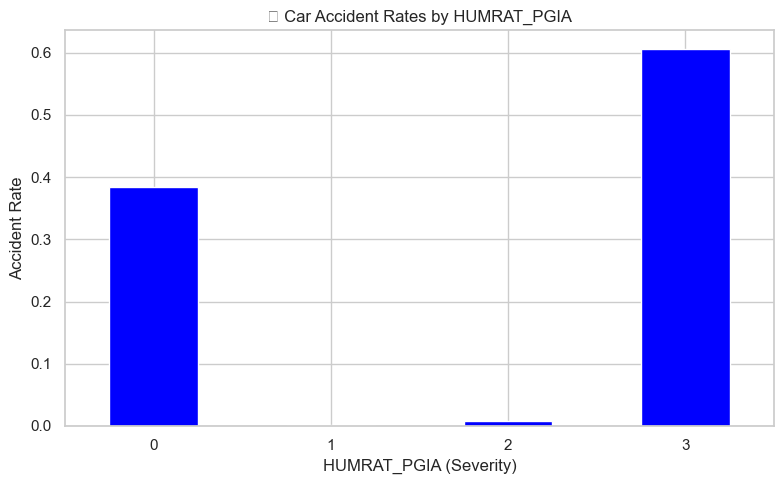

C:\Users\gilad\AppData\Local\Temp\ipykernel_540\3154632104.py:33: UserWarning: Glyph 127949 (\N{RACING MOTORCYCLE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Temp\ipykernel_540\3154632104.py:33: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127949 (\N{RACING MOTORCYCLE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


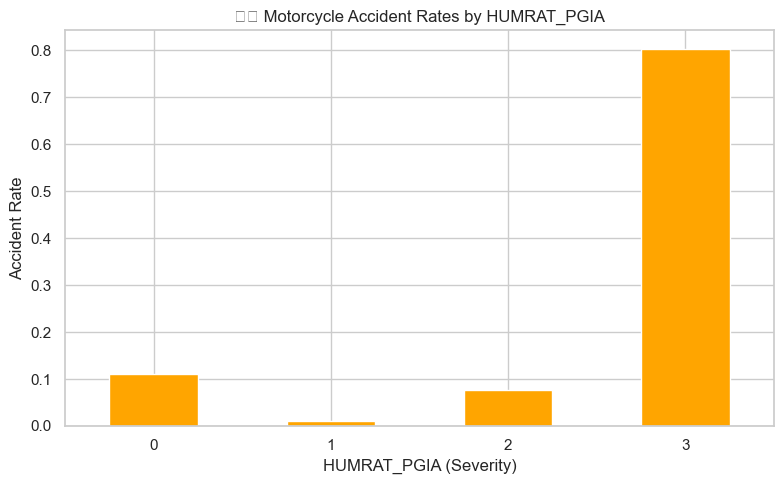

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# Define vehicle type codes
car_codes = [1]
motorcycle_codes = [8, 9, 10, 19]

# Filter car and motorcycle crashes
car_df = df2[df2['SUG_REHEV_NASA_LMS'].isin(car_codes)]
motorcycle_df = df2[df2['SUG_REHEV_NASA_LMS'].isin(motorcycle_codes)]

# Group by 'HUMRAT_PGIA' and calculate accident rates
car_rates = car_df['HUMRAT_PGIA'].value_counts(normalize=True).sort_index()
motorcycle_rates = motorcycle_df['HUMRAT_PGIA'].value_counts(normalize=True).sort_index()

# Plot car accident rates
plt.figure(figsize=(8, 5))
car_rates.plot(kind='bar', color='blue')
plt.title('🚗 Car Accident Rates by HUMRAT_PGIA')
plt.xlabel('HUMRAT_PGIA (Severity)')
plt.ylabel('Accident Rate')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Plot motorcycle accident rates
plt.figure(figsize=(8, 5))
motorcycle_rates.plot(kind='bar', color='orange')
plt.title('🏍️ Motorcycle Accident Rates by HUMRAT_PGIA')
plt.xlabel('HUMRAT_PGIA (Severity)')
plt.ylabel('Accident Rate')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Proportion of car accidents: 66.15%
Proportion of motorcycle accidents: 6.02%

Overall accident severity distribution:
HUMRAT_PGIA
0    39.01%
1     0.30%
2     2.00%
3    58.70%
Name: proportion, dtype: object


C:\Users\gilad\AppData\Local\Temp\ipykernel_540\4126206887.py:37: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Temp\ipykernel_540\4126206887.py:38: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) Arial.
  plt.savefig('car_accident_rates.png')
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


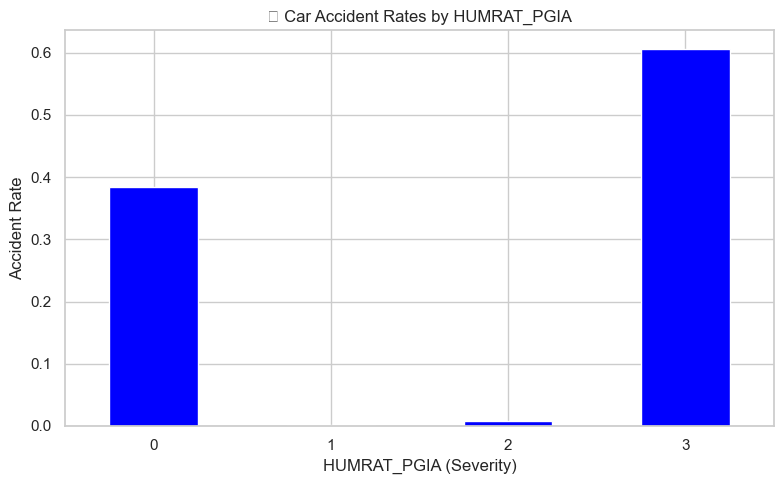

C:\Users\gilad\AppData\Local\Temp\ipykernel_540\4126206887.py:48: UserWarning: Glyph 127949 (\N{RACING MOTORCYCLE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Temp\ipykernel_540\4126206887.py:48: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gilad\AppData\Local\Temp\ipykernel_540\4126206887.py:49: UserWarning: Glyph 127949 (\N{RACING MOTORCYCLE}) missing from font(s) Arial.
  plt.savefig('motorcycle_accident_rates.png')
C:\Users\gilad\AppData\Local\Temp\ipykernel_540\4126206887.py:49: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.savefig('motorcycle_accident_rates.png')
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127949 (\N{RACING MOTORCYCLE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gilad\AppData\Local\Programs\Python\Python313\Li

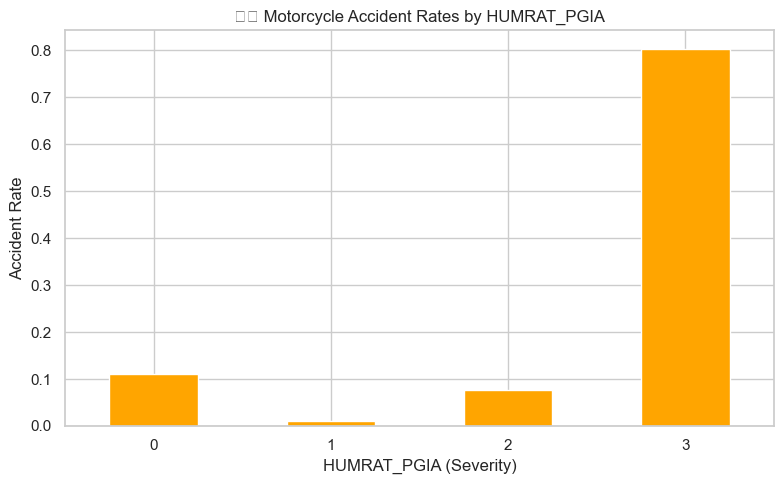

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# Define vehicle type codes
car_codes = [1]
motorcycle_codes = [8, 9, 10, 19]

# Filter car and motorcycle crashes
car_df = df2[df2['SUG_REHEV_NASA_LMS'].isin(car_codes)]
motorcycle_df = df2[df2['SUG_REHEV_NASA_LMS'].isin(motorcycle_codes)]

# Total accidents
total_accidents = len(df2)
car_accidents = len(car_df)
motorcycle_accidents = len(motorcycle_df)

# Print proportions
print(f"Proportion of car accidents: {car_accidents / total_accidents:.2%}")
print(f"Proportion of motorcycle accidents: {motorcycle_accidents / total_accidents:.2%}")

# Overall accident severity distribution
overall_severity = df2['HUMRAT_PGIA'].value_counts(normalize=True).sort_index()
print("\nOverall accident severity distribution:")
print(overall_severity.apply(lambda x: f"{x:.2%}"))

# Group by 'HUMRAT_PGIA' and calculate accident rates
car_rates = car_df['HUMRAT_PGIA'].value_counts(normalize=True).sort_index()
motorcycle_rates = motorcycle_df['HUMRAT_PGIA'].value_counts(normalize=True).sort_index()

# Plot car accident rates
plt.figure(figsize=(8, 5))
car_rates.plot(kind='bar', color='blue')
plt.title('🚗 Car Accident Rates by HUMRAT_PGIA')
plt.xlabel('HUMRAT_PGIA (Severity)')
plt.ylabel('Accident Rate')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('car_accident_rates.png')
plt.show()

# Plot motorcycle accident rates
plt.figure(figsize=(8, 5))
motorcycle_rates.plot(kind='bar', color='orange')
plt.title('🏍️ Motorcycle Accident Rates by HUMRAT_PGIA')
plt.xlabel('HUMRAT_PGIA (Severity)')
plt.ylabel('Accident Rate')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('motorcycle_accident_rates.png')
plt.show()

In [99]:
import pandas as pd

# -------------------------------
# 1. Motorcycle Accident Rate
# -------------------------------

# Define motorcycle type codes (adjust if needed)
motorcycle_codes = [8, 9, 10, 19]

# Total motorcycle accidents
motorcycle_accidents = df2[df2['SUG_REHEV_NASA_LMS'].isin(motorcycle_codes)].shape[0]

# Proxy rate: proportion of motorcycle accidents out of all accidents
motorcycle_rate_proxy = motorcycle_accidents / df2.shape[0]
print(f"🇮🇱 Motorcycle Accident Rate (Proxy): {motorcycle_rate_proxy:.4f}")

# -------------------------------
# 2. Severity Index Calculation
# -------------------------------

# Severity weights: adjust if needed based on HUMRAT_PGIA values
severity_weights = {
    1: 10,  # Fatal
    2: 5,   # Severe injury
    3: 2,   # Minor injury
    4: 1    # Property damage only
}

# Map severity scores
df2['severity_score'] = df2['HUMRAT_PGIA'].map(severity_weights)

# Calculate mean and variance
mean_severity = df2['severity_score'].mean()
var_severity = df2['severity_score'].var()

print(f"🇮🇱 Mean Severity: {mean_severity:.2f}")
print(f"🇮🇱 Severity Variance: {var_severity:.2f}")

# -------------------------------
# 3. Profile Problematic Populations
# -------------------------------

# Young drivers (under 25)
young_driver_rate = (df2['GIL_NAHAG'] < 25).mean()

# Motorcycle type profiling (if available)
# Example: SPORT = 10, SCOOTER = 9 (adjust based on dictionary)
sport_codes = [10,19]
scooter_codes = [8,9]

sport_rate = df2[df2['SUG_REHEV_NASA_LMS'].isin(sport_codes)].shape[0] / df2.shape[0]
scooter_rate = df2[df2['SUG_REHEV_NASA_LMS'].isin(scooter_codes)].shape[0] / df2.shape[0]

# Urban vs. rural (assuming 'SHEM_YISHUV' or similar column exists)
# You may need to map urban/rural based on city codes or names
# Example: urban_codes = [1, 2, 3] — adjust based on your dictionary
urban_codes = [1]  # placeholder
df2['is_urban'] = df2['SUG_YISHUV'].isin(urban_codes)
urban_rate = df2['is_urban'].mean()
rural_rate = 1 - urban_rate

print("\n🇮🇱 Problematic Population Profile:")
print(f"Young Drivers (<25): {young_driver_rate:.2%}")
print(f"Sport Bike Accidents: {sport_rate:.2%}")
print(f"Scooter Accidents: {scooter_rate:.2%}")
print(f"Urban Accidents: {urban_rate:.2%}")
print(f"Rural Accidents: {rural_rate:.2%}")

🇮🇱 Motorcycle Accident Rate (Proxy): 0.0602
🇮🇱 Mean Severity: 2.14
🇮🇱 Severity Variance: 0.59


KeyError: 'GIL_NAHAG'

In [101]:
import pandas as pd

# Motorcycle type codes and labels
motorcycle_types = {
    8: 'Up to 50cc',
    9: '51–125cc',
    10: '126–400cc',
    19: '401cc+'
}

# Severity weights based on HUMRAT_PGIA
severity_weights = {
    1: 10,  # Fatal
    2: 5,   # Severe injury
    3: 2,   # Minor injury
    4: 1    # Property damage only
}

# Urban codes (example: adjust based on your mapping)
urban_codes = [1]  # Placeholder for urban SUG_YISHUV codes

# Prepare results container
results = []

# Loop through each motorcycle type
for code, label in motorcycle_types.items():
    df_moto = df2[df2['SUG_REHEV_NASA_LMS'] == code].copy()
    total_accidents = df_moto.shape[0]

    # Accident rate proxy
    accident_rate = total_accidents / df2.shape[0]

    # Severity score
    df_moto['severity_score'] = df_moto['HUMRAT_PGIA'].map(severity_weights)
    mean_severity = df_moto['severity_score'].mean()
    var_severity = df_moto['severity_score'].var()

    # Young driver rate
    young_driver_rate = (df_moto['KVUZA_GIL'] < 25).mean()



    # Store results
    results.append({
        'Type': label,
        'Code': code,
        'Accident Rate': accident_rate,
        'Mean Severity': mean_severity,
        'Severity Variance': var_severity,
        'Young Driver %': young_driver_rate,

    })

# Convert to DataFrame and display
summary_df = pd.DataFrame(results)
print(summary_df.round(3))

KeyError: 'SUG_YISHUV'

In [103]:
import pandas as pd

# Motorcycle type codes and labels
motorcycle_types = {
    8: 'Up to 50cc',
    9: '51–125cc',
    10: '126–400cc',
    19: '401cc+'
}

# Severity weights based on HUMRAT_PGIA
severity_weights = {
    1: 10,  # Fatal
    2: 5,   # Severe injury
    3: 2,   # Minor injury
    4: 1    # Property damage only
}

# Urban codes (adjust based on dictionary)
urban_codes = [1]  # Placeholder

# Young driver groups: 15–24 years old → groups 4 and 5
young_driver_groups = [4, 5]

# Prepare results container
results = []

for code, label in motorcycle_types.items():
    df_moto = df2[df2['SUG_REHEV_NASA_LMS'] == code].copy()
    total_accidents = df_moto.shape[0]

    # Accident rate proxy
    accident_rate = total_accidents / df2.shape[0]

    # Severity score
    df_moto['severity_score'] = df_moto['HUMRAT_PGIA'].map(severity_weights)
    mean_severity = df_moto['severity_score'].mean()
    var_severity = df_moto['severity_score'].var()

    # Young driver rate using KVUZA_GIL
    young_driver_rate = df_moto['KVUZA_GIL'].isin(young_driver_groups).mean()

    # Urban vs rural


    # Store results
    results.append({
        'Type': label,
        'Code': code,
        'Accident Rate': accident_rate,
        'Mean Severity': mean_severity,
        'Severity Variance': var_severity,
        'Young Driver %': young_driver_rate,

    })

# Convert to DataFrame and display
summary_df = pd.DataFrame(results)
print(summary_df.round(3))

         Type  Code  Accident Rate  Mean Severity  Severity Variance  \
0  Up to 50cc     8          0.004          2.439              1.698   
1    51–125cc     9          0.023          2.226              0.867   
2   126–400cc    10          0.020          2.271              1.008   
3      401cc+    19          0.013          2.709              2.990   

   Young Driver %  
0           0.251  
1           0.464  
2           0.263  
3           0.247  


In [ ]:
# now we check new york .

In [105]:
import pandas as pd

# Motorcycle category definitions
categories = {
    'Up to 125cc': [8, 9],
    'Middle class': [10],
    'Heavy bikes': [19]
}

# Total registered motorcycles in Israel
total_motorcycles = 160_000
category_distribution = {
    'Up to 125cc': 0.27,
    'Middle class': 0.43,
    'Heavy bikes': 0.30
}

# Severity weights
severity_weights = {
    1: 10,  # Fatal
    2: 8,   # Severe injury
    3: 2,   # Minor injury
    4: 1    # Property damage only
}

# Prepare results
results = []

for category, codes in categories.items():
    df_cat = df2[df2['SUG_REHEV_NASA_LMS'].isin(codes)].copy()
    accident_count = df_cat.shape[0]

    # Exposure estimate
    registered_count = total_motorcycles * category_distribution[category]
    accident_rate = accident_count / registered_count

    # Severity score
    df_cat['severity_score'] = df_cat['HUMRAT_PGIA'].map(severity_weights)
    mean_severity = df_cat['severity_score'].mean()
    var_severity = df_cat['severity_score'].var()

    results.append({
        'Category': category,
        'Accident Count': accident_count,
        'Registered Estimate': int(registered_count),
        'Accident Rate': accident_rate,
        'Mean Severity': mean_severity,
        'Severity Variance': var_severity
    })

# Display results
summary_df = pd.DataFrame(results)
print(summary_df.round(3))

       Category  Accident Count  Registered Estimate  Accident Rate  \
0   Up to 125cc            3258                43200          0.075   
1  Middle class            2491                68800          0.036   
2   Heavy bikes            1656                48000          0.034   

   Mean Severity  Severity Variance  
0          2.448              2.599  
1          2.489              2.802  
2          3.146              6.113  


In [106]:
# now we check new york .


In [107]:
import pandas as pd

# Motorcycle category definitions
categories = {
    'Up to 125cc': [8, 9],
    'Middle class': [10],
    'Heavy bikes': [19]
}

# Total registered motorcycles in Israel
total_motorcycles = 160_000
category_distribution = {
    'Up to 125cc': 0.27,
    'Middle class': 0.43,
    'Heavy bikes': 0.30
}

# Severity weights (same as NYC)
severity_weights = {
    1: 10,  # Fatal
    2: 8,   # Severe injury
    3: 2,   # Minor injury
    4: 1    # Property damage only
}

# Prepare results
results = []
all_bikes_df = pd.DataFrame()

for category, codes in categories.items():
    df_cat = df2[df2['SUG_REHEV_NASA_LMS'].isin(codes)].copy()
    all_bikes_df = pd.concat([all_bikes_df, df_cat], ignore_index=True)

    accident_count = df_cat.shape[0]
    registered_count = total_motorcycles * category_distribution[category]
    accident_rate = accident_count / registered_count

    df_cat['severity_score'] = df_cat['HUMRAT_PGIA'].map(severity_weights)
    mean_severity = df_cat['severity_score'].mean()
    var_severity = df_cat['severity_score'].var()

    results.append({
        'Category': category,
        'Accident Count': accident_count,
        'Registered Estimate': int(registered_count),
        'Accident Rate': accident_rate,
        'Mean Severity': mean_severity,
        'Severity Variance': var_severity
    })

# Add combined row for all motorcycles
all_bikes_df['severity_score'] = all_bikes_df['HUMRAT_PGIA'].map(severity_weights)
combined_accident_count = all_bikes_df.shape[0]
combined_mean_severity = all_bikes_df['severity_score'].mean()
combined_var_severity = all_bikes_df['severity_score'].var()

results.append({
    'Category': 'All Motorcycles',
    'Accident Count': combined_accident_count,
    'Registered Estimate': total_motorcycles,
    'Accident Rate': combined_accident_count / total_motorcycles,
    'Mean Severity': combined_mean_severity,
    'Severity Variance': combined_var_severity
})

# Display results
summary_df = pd.DataFrame(results)
print(summary_df.round(3))

          Category  Accident Count  Registered Estimate  Accident Rate  \
0      Up to 125cc            3258                43200          0.075   
1     Middle class            2491                68800          0.036   
2      Heavy bikes            1656                48000          0.034   
3  All Motorcycles            7405               160000          0.046   

   Mean Severity  Severity Variance  
0          2.448              2.599  
1          2.489              2.802  
2          3.146              6.113  
3          2.620              3.547  


In [108]:
import pandas as pd

# Motorcycle category definitions
categories = {
    'Up to 125cc': [8, 9],
    'Middle class': [10],
    'Heavy bikes': [19]
}

# Total registered motorcycles in Israel
total_motorcycles = 160_000
category_distribution = {
    'Up to 125cc': 0.27,
    'Middle class': 0.43,
    'Heavy bikes': 0.30
}

# Severity weights
severity_weights = {
    1: 10,  # Fatal
    2: 8,   # Severe injury
    3: 2,   # Minor injury
    4: 1    # Property damage only
}

# Prepare results
results = []
all_bikes_df = pd.DataFrame()

for category, codes in categories.items():
    df_cat = df2[df2['SUG_REHEV_NASA_LMS'].isin(codes)].copy()
    all_bikes_df = pd.concat([all_bikes_df, df_cat], ignore_index=True)

    accident_count = df_cat.shape[0]
    registered_count = total_motorcycles * category_distribution[category]
    accident_rate = accident_count / registered_count

    df_cat['severity_score'] = df_cat['HUMRAT_PGIA'].map(severity_weights)
    mean_severity = df_cat['severity_score'].mean()
    var_severity = df_cat['severity_score'].var()

    results.append({
        'Category': category,
        'Accident Count': accident_count,
        'Registered Estimate': int(registered_count),
        'Accident Rate': accident_rate,
        'Mean Severity': mean_severity,
        'Severity Variance': var_severity
    })

# Add combined row for all motorcycles
all_bikes_df['severity_score'] = all_bikes_df['HUMRAT_PGIA'].map(severity_weights)
combined_accident_count = all_bikes_df.shape[0]
combined_mean_severity = all_bikes_df['severity_score'].mean()
combined_var_severity = all_bikes_df['severity_score'].var()

# Count fatal motorcycle crashes
fatal_moto_crashes = all_bikes_df[all_bikes_df['HUMRAT_PGIA'] == 1].shape[0]

# Total crashes in df2
total_crashes = df2.shape[0]

# Percentage of fatal motorcycle crashes from all crashes
fatal_moto_pct = (fatal_moto_crashes / total_crashes) * 100

# Add combined row
results.append({
    'Category': 'All Motorcycles',
    'Accident Count': combined_accident_count,
    'Registered Estimate': total_motorcycles,
    'Accident Rate': combined_accident_count / total_motorcycles,
    'Mean Severity': combined_mean_severity,
    'Severity Variance': combined_var_severity,
    'Fatal Motorcycle Crashes': fatal_moto_crashes,
    'Fatal Crash % of All': fatal_moto_pct
})

# Display results
summary_df = pd.DataFrame(results)
print(summary_df.round(3))

          Category  Accident Count  Registered Estimate  Accident Rate  \
0      Up to 125cc            3258                43200          0.075   
1     Middle class            2491                68800          0.036   
2      Heavy bikes            1656                48000          0.034   
3  All Motorcycles            7405               160000          0.046   

   Mean Severity  Severity Variance  Fatal Motorcycle Crashes  \
0          2.448              2.599                       NaN   
1          2.489              2.802                       NaN   
2          3.146              6.113                       NaN   
3          2.620              3.547                      86.0   

   Fatal Crash % of All  
0                   NaN  
1                   NaN  
2                   NaN  
3                  0.07  


In [110]:
import pandas as pd

# Total crashes
total_crashes = df1.shape[0]

# Fatal crashes (HUMRAT_PGIA == 1)
fatal_crashes = df2[df2['HUMRAT_PGIA'] == 1].shape[0]

# Percentage
fatal_pct = (fatal_crashes / total_crashes) * 100

# Print results
print(f"🔢 Total Crashes: {total_crashes}")
print(f"☠️ Fatal Crashes: {fatal_crashes}")
print(f"📊 Percentage of Fatal Crashes: {fatal_pct:.2f}%")

🔢 Total Crashes: 53015
☠️ Fatal Crashes: 364
📊 Percentage of Fatal Crashes: 0.69%


In [111]:
import pandas as pd

# Motorcycle type codes
motorcycle_codes = [8, 9, 10, 19]

# Total crashes
total_crashes = df1.shape[0]

# Fatal crashes
fatal_crashes = df2[df2['HUMRAT_PGIA'] == 1].shape[0]

# Motorcycle-involved crashes
moto_crashes = df2[df2['SUG_REHEV_NASA_LMS'].isin(motorcycle_codes)]
moto_crash_count = moto_crashes.shape[0]

# Fatal motorcycle crashes
fatal_moto_crash_count = moto_crashes[moto_crashes['HUMRAT_PGIA'] == 1].shape[0]

# Percentages
fatal_pct = (fatal_crashes / total_crashes) * 100
moto_pct = (moto_crash_count / total_crashes) * 100
fatal_moto_pct = (fatal_moto_crash_count / total_crashes) * 100

# Print results
print(f"🔢 Total Crashes: {total_crashes}")
print(f"☠️ Fatal Crashes: {fatal_crashes}")
print(f"📊 Percentage of Fatal Crashes: {fatal_pct:.2f}%")
print(f"🏍️ Motorcycle-Involved Crashes: {moto_crash_count}")
print(f"📊 Percentage of Motorcycle Crashes: {moto_pct:.2f}%")
print(f"☠️ Fatal Motorcycle Crashes: {fatal_moto_crash_count}")
print(f"📊 Percentage of Fatal Motorcycle Crashes: {fatal_moto_pct:.2f}%")

🔢 Total Crashes: 53015
☠️ Fatal Crashes: 364
📊 Percentage of Fatal Crashes: 0.69%
🏍️ Motorcycle-Involved Crashes: 7405
📊 Percentage of Motorcycle Crashes: 13.97%
☠️ Fatal Motorcycle Crashes: 86
📊 Percentage of Fatal Motorcycle Crashes: 0.16%
